In [6]:
#from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp


from sklearn.cluster import AgglomerativeClustering, DBSCAN

from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation



import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

plt.rcParams["figure.figsize"] = (5,5)

from pandas_datareader import wb

import seaborn as sns

from sklearn import preprocessing


import feature_finder_keiko as ff
import feature_finder_f as ff1
from statsmodels.tsa.stattools import adfuller

plt.rcParams["figure.figsize"] = (20,10)

from scipy import linalg
import scipy.stats as st

In [2]:
tau = 12

n_components_sst = 98

link_caus = np.load("./link_rotated_station/best_link_1976_2010_{}.npy".format(tau))
#link_corr = np.load("./link_rotated_station/best_link_corr_1976_2011_{}.npy".format(tau))

FileNotFoundError: [Errno 2] No such file or directory: './link_rotated_station/best_link_1976_2010_12.npy'

In [5]:
train_start = 1976
validation_end = 2010

n_components_sst = 98

link_caus = np.load("../../whole_data_results/link_rotated_station/best_link_{}_{}_{}.npy".format(train_start, validation_end,tau))
#link_corr = np.load("./link_rotated_station/best_link_corr_{}_{}_{}.npy".format(train_start, validation_end,tau))

temporal_limits = {"time_min":datetime(train_start, 1, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}
original_count, count = ff.drought_timeseries("../npy_files/ET_gamma_18912015.npy",train_start,validation_end)
data_sst, ts, V, df_sst, avg, std = ff.PCA_computer_rotated('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst, -9.96921e+36)

test_start = validation_end + 1
test_end = test_start + 4

temporal_limits_test = {"time_min":datetime(test_start, 1, 1, 0, 0),"time_max":datetime(test_end, 12, 1, 0, 0)}
data_sst_test = ff.data_generator_avg_std('../../../nc/sst.mnmean.nc', "sst",temporal_limits_test, avg, std, 12, -9.96921e+36)
original_count_test, count_test = ff.drought_timeseries("../npy_files/ET_gamma_18912015.npy",test_start,test_end)

In [166]:
tau = 12
#model_generator_V(count, data_sst, link, V, tau)

In [167]:
model_list = []
link  = np.load("./link_rotated_station/best_link_1976_2010_{}.npy".format(13 - tau ))

start_lag = tau - 1
end_lag = tau+13

df = pd.DataFrame({"drought": original_count})
lags = np.arange(start_lag,end_lag)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})

df = df.dropna()

df = df.drop(["drought"],axis = 1)

In [168]:
df

,drought (t-11),drought (t-12),drought (t-13),drought (t-14),drought (t-15),drought (t-16),drought (t-17),drought (t-18),drought (t-19),drought (t-20),drought (t-21),drought (t-22),drought (t-23),drought (t-24)
24,38.0,54.0,52.0,76.0,74.0,43.0,38.0,37.0,20.0,52.0,48.0,62.0,62.0,62.0
25,42.0,38.0,54.0,52.0,76.0,74.0,43.0,38.0,37.0,20.0,52.0,48.0,62.0,62.0
26,43.0,42.0,38.0,54.0,52.0,76.0,74.0,43.0,38.0,37.0,20.0,52.0,48.0,62.0
27,53.0,43.0,42.0,38.0,54.0,52.0,76.0,74.0,43.0,38.0,37.0,20.0,52.0,48.0
28,66.0,53.0,43.0,42.0,38.0,54.0,52.0,76.0,74.0,43.0,38.0,37.0,20.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,92.0,109.0,105.0,81.0,37.0,48.0,61.0,65.0,70.0,72.0,89.0,108.0,87.0,90.0
416,126.0,92.0,109.0,105.0,81.0,37.0,48.0,61.0,65.0,70.0,72.0,89.0,108.0,87.0
417,102.0,126.0,92.0,109.0,105.0,81.0,37.0,48.0,61.0,65.0,70.0,72.0,89.0,108.0
418,154.0,102.0,126.0,92.0,109.0,105.0,81.0,37.0,48.0,61.0,65.0,70.0,72.0,89.0


In [152]:
x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
model.fit(x_train, y_train);
model_list.append(model)

In [153]:
estimate = pd.DataFrame({})
estimate[tau-1] = model.predict(x_train)

In [154]:
for tau in np.arange(11,0,-1):   
    link  = np.load("./link_rotated_station/best_link_1976_2010_{}.npy".format(13 - tau))

    start_lag = tau-1
    end_lag = tau+13

    df = pd.DataFrame({"drought": original_count})
    lags = np.arange(start_lag,end_lag)
    df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in lags
    for col in df
    })

    df = df.dropna()
    df = df.drop(["drought"],axis = 1)
    
    for t in range(11, tau, -1):
        col_name = 'drought (t-{})'.format(t-1)
        df[col_name][12 - tau:] = np.ravel(estimate[t].values)
    df = df.iloc[12 - tau:,:]
    
    x_train = df.iloc[:,1:]
    y_train = df.iloc[:,0]
    model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
    model.fit(x_train, y_train);
    model_list.append(model)
    estimate[tau-1] = model.predict(x_train) 

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [156]:
tau = 12


start_lag = tau - 1
end_lag = tau+13

df = pd.DataFrame({"drought": original_count_test})
lags = np.arange(start_lag,end_lag)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})

df = df.dropna()

df = df.drop(["drought"],axis = 1)

x_test = df.iloc[:,1:]
y_test = df.iloc[:,0]


estimate_test = pd.DataFrame({})
estimate_test[tau-1] = model_list[0].predict(x_test)

for tau in np.arange(11,0,-1):   
    link  = np.load("./link_rotated_station/best_link_1976_2010_{}.npy".format(13 - tau))

    start_lag = tau-1
    end_lag = tau+13

    df = pd.DataFrame({"drought": original_count_test})
    lags = np.arange(start_lag,end_lag)
    df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in lags
    for col in df
    })

    df = df.dropna()
    df = df.drop(["drought"],axis = 1)
    for t in range(11, tau, -1):
        col_name = 'drought (t-{})'.format(t-1)
        df[col_name][12 - tau:] = np.ravel(estimate_test[t].values)
    df = df.iloc[12 - tau:,:]
    x_test = df.iloc[:,1:]
    y_test = df.iloc[:,0]

    estimate_test[tau-1] = model_list[12 - tau].predict(x_test) 

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
tau = 12
#model_generator_V(count, data_sst, link, V, tau)

In [84]:
model_list = []
link  = np.load("./link_rotated_station/best_link_1976_2010_{}.npy".format(13 - tau ))

start_lag = tau - 1
end_lag = tau+13

df = pd.DataFrame({"drought": original_count})
lags = np.arange(start_lag,end_lag)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})
for k in range(len(link)):
    df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
    df[str(k)] = df[str(k)].shift(abs(link[k,1] + 11))
df = df.dropna()

df = df.drop(["drought"],axis = 1)

x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
model.fit(x_train, y_train);
model_list.append(model)

In [85]:
estimate = pd.DataFrame({})
estimate[tau-1] = model.predict(x_train)

In [86]:
for tau in np.arange(11,0,-1):   
    link  = np.load("./link_rotated_station/best_link_1976_2010_{}.npy".format(13 - tau))

    start_lag = tau-1
    end_lag = tau+13

    df = pd.DataFrame({"drought": original_count})
    lags = np.arange(start_lag,end_lag)
    df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in lags
    for col in df
    })
    for k in range(len(link)):
        df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
        df[str(k)] = df[str(k)].shift(abs(link[k,1] + 11))
    df = df.dropna()
    df = df.drop(["drought"],axis = 1)
    
    for t in range(11, tau, -1):
        col_name = 'drought (t-{})'.format(t-1)
        df[col_name][12 - tau:] = np.ravel(estimate[t].values)
    df = df.iloc[12 - tau:,:]
    
    x_train = df.iloc[:,1:]
    y_train = df.iloc[:,0]
    model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
    model.fit(x_train, y_train);
    model_list.append(model)
    estimate[tau-1] = model.predict(x_train) 

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [88]:
tau = 12

In [89]:
link  = np.load("./link_rotated_station/best_link_1976_2010_{}.npy".format(13 - tau ))

start_lag = tau - 1
end_lag = tau+13

df = pd.DataFrame({"drought": original_count_test})
lags = np.arange(start_lag,end_lag)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})
for k in range(len(link)):
    df[str(k)] = ff.time_series_maker_V(data_sst_test, V[:,link[k,0]-1])
    df[str(k)] = df[str(k)].shift(abs(link[k,1] + 11))
df = df.dropna()

df = df.drop(["drought"],axis = 1)

x_test = df.iloc[:,1:]
y_test = df.iloc[:,0]


In [90]:
estimate_test = pd.DataFrame({})
estimate_test[tau-1] = model_list[0].predict(x_test)

In [91]:
for tau in np.arange(11,0,-1):   
    link  = np.load("./link_rotated_station/best_link_1976_2010_{}.npy".format(13 - tau))

    start_lag = tau-1
    end_lag = tau+13

    df = pd.DataFrame({"drought": original_count_test})
    lags = np.arange(start_lag,end_lag)
    df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in lags
    for col in df
    })
    for k in range(len(link)):
        df[str(k)] = ff.time_series_maker_V(data_sst_test, V[:,link[k,0]-1])
        df[str(k)] = df[str(k)].shift(abs(link[k,1] + 11))
    df = df.dropna()
    df = df.drop(["drought"],axis = 1)
    for t in range(11, tau, -1):
        col_name = 'drought (t-{})'.format(t-1)
        df[col_name][12 - tau:] = np.ravel(estimate_test[t].values)
    df = df.iloc[12 - tau:,:]
    x_test = df.iloc[:,1:]
    y_test = df.iloc[:,0]

    estimate_test[tau-1] = model_list[12 - tau].predict(x_test) 

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [111]:
estimate_test[0].values

array([140.77331978, 143.63083278,  60.68455826,  50.68956916,
        75.43842523,  65.572278  ,  62.6628197 ,  62.72003576,
       121.36899098,  76.66456626, 122.33312803,  86.30419457,
       117.60047663,  69.7318225 , 105.76056755,  58.91985484,
        57.74548052,  59.85411631,  53.97708096, 112.67777348,
       110.61282213, 100.44997502, 120.65667338,  76.72849901,
        99.23041666,  86.87864886,  72.34050496,  84.69835407,
        91.20753014,  88.93286043,  54.13063654,  71.65037012,
        62.33390119, 138.75178347,  70.63162321, 136.04095906])

In [99]:
count_test[24:] - estimate_test[0].values

array([-165.91283075, -168.39043267,  -84.06424706,  -60.68934688,
        -66.05829186,  -70.81223354,  -69.52286416,  -78.20016913,
       -139.46921327,  -85.38487746, -142.67352814, -107.2646836 ,
       -137.18105457,  -89.93248935, -125.58132332,  -78.36069952,
        -73.80641412,  -78.53513882,  -72.27819237, -119.59897382,
       -118.15411138, -105.61135318, -126.43814045,  -74.130055  ,
        -99.25206156,  -83.52038267,  -65.60232769,  -77.58026571,
        -92.70953069,  -91.0549499 ,  -56.87281492,  -59.01263741,
        -36.3162574 ,  -90.35422859,    4.14584275,  -65.88358201])

In [110]:
len(y_test)

36

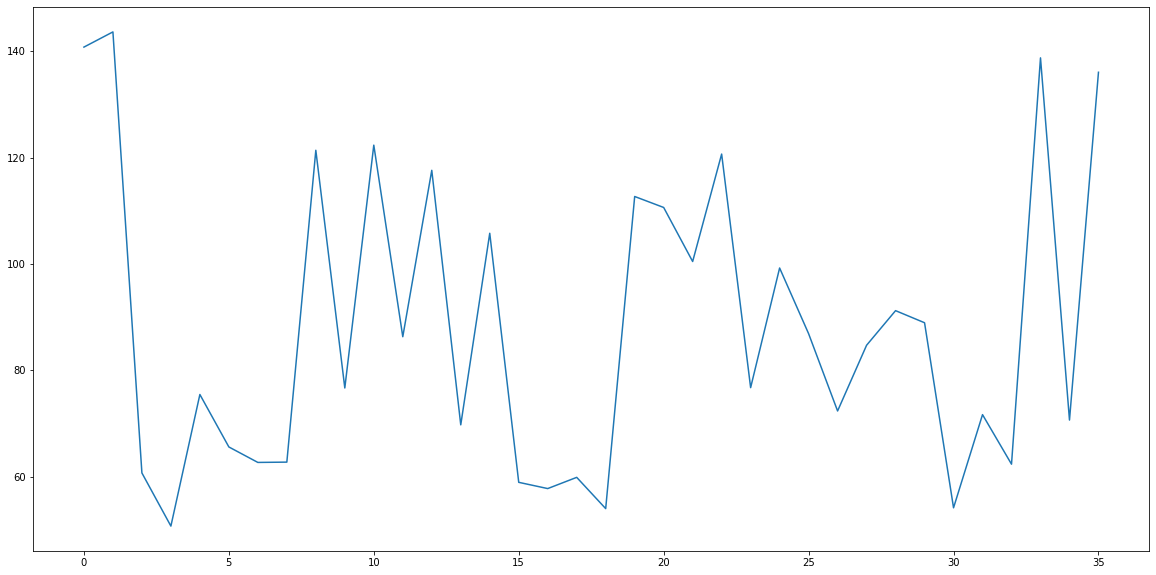

In [101]:
plt.plot(estimate_test[0].values)

In [119]:
train_start = np.arange(1926,1977,5)
train_end = np.arange(1955,2006,5)
validation_end = np.arange(1960,2011,5)
test_start = np.arange(1961,2012,5)
test_end = np.arange(1965,2016,5)

n_components_sst = 98
Index = 360
taus = np.arange(1,13,1)


model_results= []
model_p = []
for ijz in range(len(train_start)):
    temporal_limits = {"time_min":datetime(train_start[ijz], 1, 1, 0, 0),"time_max":datetime(validation_end[ijz], 12, 1, 0, 0)}
    original_count, count = ff.drought_timeseries("../npy_files/ET_gamma_18912015.npy",train_start[ijz],validation_end[ijz])
    data_sst, ts, V, df_sst, avg, std = ff.PCA_computer_rotated('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst, -9.96921e+36)

    tau = 12

    model_list = []
    link = np.load("./link_rotated_station/best_link_{}_{}_{}.npy".format(train_start[ijz],validation_end[ijz],np.abs(13 - tau)))

    start_lag = tau - 1
    end_lag = tau+13

    df = pd.DataFrame({"drought": original_count})
    lags = np.arange(start_lag,end_lag)
    df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in lags
    for col in df
    })
    for k in range(len(link)):
        df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
        df[str(k)] = df[str(k)].shift(abs(link[k,1] + 11))
    df = df.dropna()

    df = df.drop(["drought"],axis = 1)

    x_train = df.iloc[:,1:]
    y_train = df.iloc[:,0]
    model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
    model.fit(x_train, y_train);
    model_list.append(model)

    estimate = pd.DataFrame({})
    estimate[tau-1] = model.predict(x_train)

    for tau in np.arange(11,0,-1):   
        link = np.load("./link_rotated_station/best_link_{}_{}_{}.npy".format(train_start[ijz],validation_end[ijz],np.abs(13 - tau)))

        start_lag = tau-1
        end_lag = tau+13

        df = pd.DataFrame({"drought": original_count})
        lags = np.arange(start_lag,end_lag)
        df = df.assign(**{
        '{} (t-{})'.format(col, t): df[col].shift(t)
        for t in lags
        for col in df
        })
        for k in range(len(link)):
            df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
            df[str(k)] = df[str(k)].shift(abs(link[k,1] + 11))
        df = df.dropna()
        df = df.drop(["drought"],axis = 1)

        for t in range(11, tau, -1):
            col_name = 'drought (t-{})'.format(t-1)
            df[col_name][12 - tau:] = np.ravel(estimate[t].values)
        df = df.iloc[12 - tau:,:]

        x_train = df.iloc[:,1:]
        y_train = df.iloc[:,0]
        model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
        model.fit(x_train, y_train);
        model_list.append(model)
        estimate[tau-1] = model.predict(x_train) 
                       
    temporal_limits = {"time_min":datetime(test_start[ijz], 1, 1, 0, 0),"time_max":datetime(test_end[ijz], 12, 1, 0, 0)}
    data_sst = ff.data_generator_avg_std('../../../nc/sst.mnmean.nc', "sst",temporal_limits, avg, std, 12, -9.96921e+36)
    original_count_test, _ = ff.drought_timeseries("../npy_files/ET_gamma_18912015.npy",test_start[ijz],test_end[ijz])            
        
    tau = 12

    link = np.load("./link_rotated_station/best_link_{}_{}_{}.npy".format(train_start[ijz],validation_end[ijz],np.abs(13 - tau)))

    start_lag = tau - 1
    end_lag = tau+13

    df = pd.DataFrame({"drought": original_count_test})
    lags = np.arange(start_lag,end_lag)
    df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in lags
    for col in df
    })
    for k in range(len(link)):
        df[str(k)] = ff.time_series_maker_V(data_sst_test, V[:,link[k,0]-1])
        df[str(k)] = df[str(k)].shift(abs(link[k,1] + 11))
    df = df.dropna()

    df = df.drop(["drought"],axis = 1)

    x_test = df.iloc[:,1:]
    y_test = df.iloc[:,0]


    estimate_test = pd.DataFrame({})
    estimate_test[tau-1] = model_list[0].predict(x_test)

    for tau in np.arange(11,0,-1):   
        link = np.load("./link_rotated_station/best_link_{}_{}_{}.npy".format(train_start[ijz],validation_end[ijz],np.abs(13 - tau)))

        start_lag = tau-1
        end_lag = tau+13

        df = pd.DataFrame({"drought": original_count_test})
        lags = np.arange(start_lag,end_lag)
        df = df.assign(**{
        '{} (t-{})'.format(col, t): df[col].shift(t)
        for t in lags
        for col in df
        })
        for k in range(len(link)):
            df[str(k)] = ff.time_series_maker_V(data_sst_test, V[:,link[k,0]-1])
            df[str(k)] = df[str(k)].shift(abs(link[k,1] + 11))
        df = df.dropna()
        df = df.drop(["drought"],axis = 1)
        for t in range(11, tau, -1):
            col_name = 'drought (t-{})'.format(t-1)
            df[col_name][12 - tau:] = np.ravel(estimate_test[t].values)
        df = df.iloc[12 - tau:,:]
        x_test = df.iloc[:,1:]
        y_test = df.iloc[:,0]

        estimate_test[tau-1] = model_list[12 - tau].predict(x_test) 
        
    model_results.append(mean_squared_error(estimate_test[0].values, y_test))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.

In [121]:
np.mean(model_results)

3401.058763068542

In [ ]:
model_results = 

In [162]:
m = np.sqrt(np.array(model_results))

In [163]:
np.mean(m/303)

0.15921272502423642

In [158]:
train_start = np.arange(1926,1977,5)
train_end = np.arange(1955,2006,5)
validation_end = np.arange(1960,2011,5)
test_start = np.arange(1961,2012,5)
test_end = np.arange(1965,2016,5)

n_components_sst = 98
Index = 360
taus = np.arange(1,13,1)


model_results= []
model_p = []
for ijz in range(len(train_start)):
    temporal_limits = {"time_min":datetime(train_start[ijz], 1, 1, 0, 0),"time_max":datetime(validation_end[ijz], 12, 1, 0, 0)}
    original_count, count = ff.drought_timeseries("../npy_files/ET_gamma_18912015.npy",train_start[ijz],validation_end[ijz])
    data_sst, ts, V, df_sst, avg, std = ff.PCA_computer_rotated('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst, -9.96921e+36)

    tau = 12

    model_list = []

    start_lag = tau - 1
    end_lag = tau+13

    df = pd.DataFrame({"drought": original_count})
    lags = np.arange(start_lag,end_lag)
    df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in lags
    for col in df
    })

    df = df.dropna()

    df = df.drop(["drought"],axis = 1)

    x_train = df.iloc[:,1:]
    y_train = df.iloc[:,0]
    model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
    model.fit(x_train, y_train);
    model_list.append(model)

    estimate = pd.DataFrame({})
    estimate[tau-1] = model.predict(x_train)

    for tau in np.arange(11,0,-1):   

        start_lag = tau-1
        end_lag = tau+13

        df = pd.DataFrame({"drought": original_count})
        lags = np.arange(start_lag,end_lag)
        df = df.assign(**{
        '{} (t-{})'.format(col, t): df[col].shift(t)
        for t in lags
        for col in df
        })

        df = df.dropna()
        df = df.drop(["drought"],axis = 1)

        for t in range(11, tau, -1):
            col_name = 'drought (t-{})'.format(t-1)
            df[col_name][12 - tau:] = np.ravel(estimate[t].values)
        df = df.iloc[12 - tau:,:]

        x_train = df.iloc[:,1:]
        y_train = df.iloc[:,0]
        model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
        model.fit(x_train, y_train);
        model_list.append(model)
        estimate[tau-1] = model.predict(x_train) 
                       
    temporal_limits = {"time_min":datetime(test_start[ijz], 1, 1, 0, 0),"time_max":datetime(test_end[ijz], 12, 1, 0, 0)}
    data_sst = ff.data_generator_avg_std('../../../nc/sst.mnmean.nc', "sst",temporal_limits, avg, std, 12, -9.96921e+36)
    original_count_test, _ = ff.drought_timeseries("../npy_files/ET_gamma_18912015.npy",test_start[ijz],test_end[ijz])            
        
    tau = 12


    start_lag = tau - 1
    end_lag = tau+13

    df = pd.DataFrame({"drought": original_count_test})
    lags = np.arange(start_lag,end_lag)
    df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in lags
    for col in df
    })

    df = df.dropna()

    df = df.drop(["drought"],axis = 1)

    x_test = df.iloc[:,1:]
    y_test = df.iloc[:,0]


    estimate_test = pd.DataFrame({})
    estimate_test[tau-1] = model_list[0].predict(x_test)

    for tau in np.arange(11,0,-1):   

        start_lag = tau-1
        end_lag = tau+13

        df = pd.DataFrame({"drought": original_count_test})
        lags = np.arange(start_lag,end_lag)
        df = df.assign(**{
        '{} (t-{})'.format(col, t): df[col].shift(t)
        for t in lags
        for col in df
        })

        df = df.dropna()
        df = df.drop(["drought"],axis = 1)
        for t in range(11, tau, -1):
            col_name = 'drought (t-{})'.format(t-1)
            df[col_name][12 - tau:] = np.ravel(estimate_test[t].values)
        df = df.iloc[12 - tau:,:]
        x_test = df.iloc[:,1:]
        y_test = df.iloc[:,0]

        estimate_test[tau-1] = model_list[12 - tau].predict(x_test) 
        
    model_results.append(mean_squared_error(estimate_test[0].values, y_test))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.

In [159]:
model_results

[1568.5777104073256,
 897.8091151322592,
 4738.4583752065955,
 853.6160000842531,
 4332.521691459469,
 4512.752993097868,
 3125.155543382362,
 1236.9864601545255,
 1228.5229574878338,
 1821.2419345837095,
 3749.7220534733538]

In [191]:
def df_creator(tau, count):

    link  = np.load("./link_rotated_station/best_link_1976_2010_{}.npy".format(tau))

    start_lag = tau
    end_lag = tau+13

    df = pd.DataFrame({"drought": count})
    lags = np.arange(start_lag,end_lag)
    df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in lags
    for col in df
    })
    for k in range(len(link)):
        df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
        df[str(k)] = df[str(k)].shift(abs(link[k,1]))
    df = df.dropna()
    return(df)


In [108]:
x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
model.fit(x_train, y_train);

In [109]:
estimate[tau] = model.predict(x_train)

In [205]:
df_1 = df_creator(1, original_count)
df_3 = df_creator(3, original_count)

In [206]:
df_1

,drought,drought (t-1),drought (t-2),drought (t-3),drought (t-4),drought (t-5),drought (t-6),drought (t-7),drought (t-8),drought (t-9),...,0,1,2,3,4,5,6,7,8,9
13,38,54.0,52.0,76.0,74.0,43.0,38.0,37.0,20.0,52.0,...,17.511173,5.886130,0.320526,-2.925447,-1.604837,-0.147346,-10.695826,-12.567251,-22.088227,13.834088
14,42,38.0,54.0,52.0,76.0,74.0,43.0,38.0,37.0,20.0,...,23.916619,8.348385,-2.721930,11.419039,0.936586,1.826055,-2.258254,-13.522067,-15.828074,0.068673
15,43,42.0,38.0,54.0,52.0,76.0,74.0,43.0,38.0,37.0,...,26.828392,3.329042,-2.579976,13.320818,4.897126,4.700872,4.637502,-11.099552,-9.846734,-2.771124
16,53,43.0,42.0,38.0,54.0,52.0,76.0,74.0,43.0,38.0,...,22.718291,4.044546,-3.461737,9.076801,-1.413124,-1.365333,3.739287,-5.793458,-6.654998,2.866633
17,66,53.0,43.0,42.0,38.0,54.0,52.0,76.0,74.0,43.0,...,17.357993,1.757363,-4.637108,12.422217,-4.546600,-1.966751,0.939986,-1.761447,-2.243796,7.945284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,64,64.0,62.0,78.0,84.0,102.0,133.0,115.0,154.0,102.0,...,3.722637,-1.986060,-0.045718,4.110251,7.206401,-2.871445,1.293599,-5.853768,15.144268,5.474132
416,51,64.0,64.0,62.0,78.0,84.0,102.0,133.0,115.0,154.0,...,2.170258,-9.870826,3.493543,2.528039,1.490510,6.827485,12.301973,-7.775173,16.534709,6.317493
417,40,51.0,64.0,64.0,62.0,78.0,84.0,102.0,133.0,115.0,...,2.096354,-11.027523,3.009937,13.401400,-2.627242,2.467358,8.930664,-12.620053,12.716279,14.072570
418,42,40.0,51.0,64.0,64.0,62.0,78.0,84.0,102.0,133.0,...,3.434137,-8.660070,5.681938,13.116449,-6.473440,4.230573,11.808888,-8.540932,11.987082,11.589606


In [211]:
df_2.columns

Index(['drought', 'drought (t-2)', 'drought (t-3)', 'drought (t-4)',
       'drought (t-5)', 'drought (t-6)', 'drought (t-7)', 'drought (t-8)',
       'drought (t-9)', 'drought (t-10)', 'drought (t-11)', 'drought (t-12)',
       'drought (t-13)', 'drought (t-14)', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13'],
      dtype='object')

In [170]:
df_1.iloc[12,:]

drought           54.000000
drought (t-1)     52.000000
drought (t-2)     76.000000
drought (t-3)     74.000000
drought (t-4)     43.000000
drought (t-5)     38.000000
drought (t-6)     37.000000
drought (t-7)     20.000000
drought (t-8)     52.000000
drought (t-9)     48.000000
drought (t-10)    62.000000
drought (t-11)    62.000000
drought (t-12)    62.000000
0                  5.334867
1                  4.707341
2                  2.410714
3                 -2.050510
4                 -1.696720
5                  0.857562
6                -16.033638
7                 -8.048276
8                       NaN
9                 -2.718153
Name: 12, dtype: float64

In [165]:
df_1.columns

Index(['drought', 'drought (t-1)', 'drought (t-2)', 'drought (t-3)',
       'drought (t-4)', 'drought (t-5)', 'drought (t-6)', 'drought (t-7)',
       'drought (t-8)', 'drought (t-9)', 'drought (t-10)', 'drought (t-11)',
       'drought (t-12)', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype='object')

In [164]:
df_2.columns

Index(['drought', 'drought (t-2)', 'drought (t-3)', 'drought (t-4)',
       'drought (t-5)', 'drought (t-6)', 'drought (t-7)', 'drought (t-8)',
       'drought (t-9)', 'drought (t-10)', 'drought (t-11)', 'drought (t-12)',
       'drought (t-13)', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13'],
      dtype='object')

In [123]:
for t in range(1,tau):
    col_name = 'drought(t-{})'.format(end_lag - t)
    df[col_name] = estimate[t].values

In [124]:
estimate[1].shape

(407,)

In [95]:
df['drought (t-13)'] = estimate[1].values

In [116]:
df['drought (t-14)'].shape

(406,)

In [101]:
df['drought (t-14)']

14      3.712465
15      3.737522
16      3.762579
17    -10.212364
18     -6.187307
         ...    
415    32.760319
416    56.785376
417    60.810433
418    43.835490
419    77.860547
Name: drought (t-14), Length: 406, dtype: float64

In [225]:
taus =  np.arange(2,4)

In [226]:
taus

array([2, 3])

In [227]:
for tau in taus:
    link  = np.load("./link_rotated_station/best_link_1976_2010_{}.npy".format(tau))

    start_lag = tau
    end_lag = tau+13

    df = pd.DataFrame({"drought": count})
    lags = np.arange(start_lag,end_lag)
    df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in lags
    for col in df
    })
    for k in range(len(link)):
        df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
        df[str(k)] = df[str(k)].shift(abs(link[k,1]))
    df = df.dropna()
    
    for t in range(1,tau):
        col_name = 'drought(t-{})'.format(end_lag)
        df[col_name] = estimate[t][t:]


KeyError: 2

,drought,drought (t-2),drought (t-3),drought (t-4),drought (t-5),drought (t-6),drought (t-7),drought (t-8),drought (t-9),drought (t-10),...,5,6,7,8,9,10,11,12,13,drought(t-15)
14,-15.936737,-3.986851,-6.011908,17.963035,15.937978,-15.087079,-20.112136,-21.137193,-38.162250,-6.187307,...,16.118514,11.462839,-4.746606,-5.671146,1.383343,-4.221825,3.323858,11.148872,-2.722518,-30.525651
15,-14.911680,-19.961794,-3.986851,-6.011908,17.963035,15.937978,-15.087079,-20.112136,-21.137193,-38.162250,...,20.113836,9.410266,-5.003877,-9.053494,3.278155,0.337300,7.547993,-4.343418,-1.486615,-35.607781
16,-4.886623,-15.936737,-19.961794,-3.986851,-6.011908,17.963035,15.937978,-15.087079,-20.112136,-21.137193,...,17.912600,1.370143,-2.679721,-2.742329,6.919723,-5.155482,10.048280,3.505684,-0.188573,-45.510021
17,8.138434,-14.911680,-15.936737,-19.961794,-3.986851,-6.011908,17.963035,15.937978,-15.087079,-20.112136,...,12.684535,-2.954370,-1.911604,-1.709395,2.453844,-0.528985,2.729116,2.223241,1.730430,-40.761314
18,-1.836509,-4.886623,-14.911680,-15.936737,-19.961794,-3.986851,-6.011908,17.963035,15.937978,-15.087079,...,8.304285,-18.363536,0.096767,-4.263618,-1.253555,-9.326466,-0.046647,0.547622,2.848561,-40.600739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,16.111117,14.061003,30.035946,36.010889,53.985832,84.960775,66.935718,105.910661,53.885604,77.860547,...,12.516881,-10.283187,2.058422,-0.829335,-3.851150,5.046041,-6.912518,3.073990,4.867615,NaN
416,3.136174,16.086060,14.061003,30.035946,36.010889,53.985832,84.960775,66.935718,105.910661,53.885604,...,10.503332,-10.058219,9.772828,6.716388,-8.302070,6.639134,3.880064,-0.912465,2.249266,NaN
417,-7.838769,16.111117,16.086060,14.061003,30.035946,36.010889,53.985832,84.960775,66.935718,105.910661,...,14.257228,-11.106718,16.746160,6.933395,-8.999292,5.577956,-6.299369,-4.507990,2.367989,NaN
418,-5.813712,3.136174,16.111117,16.086060,14.061003,30.035946,36.010889,53.985832,84.960775,66.935718,...,11.441569,-13.631456,19.385662,1.775429,-7.352878,2.938285,-5.801314,-9.958814,9.345769,NaN


In [44]:
df.columns

Index(['drought', 'drought (t-6)', 'drought (t-7)', 'drought (t-8)',
       'drought (t-9)', 'drought (t-10)', 'drought (t-11)', 'drought (t-12)',
       'drought (t-13)', 'drought (t-14)', 'drought (t-15)', 'drought (t-16)',
       'drought (t-17)', '0', '1', '2', '3', '4', '5', '6', '7', '8'],
      dtype='object')

In [ ]:
'drought(t-{})'.format(t)

In [53]:
end_lag - 1 - 0

17

In [25]:
x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
model.fit(x_train, y_train);

In [28]:
estimate = pd.DataFrame({})

In [29]:
estimate[tau] = model.predict(x_train)

In [19]:
for 

Index(['drought', 'drought (t-1)', 'drought (t-2)', 'drought (t-3)',
       'drought (t-4)', 'drought (t-5)', 'drought (t-6)', 'drought (t-7)',
       'drought (t-8)', 'drought (t-9)', 'drought (t-10)', 'drought (t-11)',
       'drought (t-12)', 'drought (t-13)', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9'],
      dtype='object')

In [ ]:
def model_generator_V(count, data_sst, link, V, tau, ratio = 0.8, n_estimators=100, max_depth=5):
    
    start_lag = tau
    end_lag = tau+12
    
    df = pd.DataFrame({"drought":count})
    df = ff.shift_df(df, start_lag, end_lag)
    x_train = df.iloc[:,1:]
    y_train = df.iloc[:,0]
    base_model = RandomForestRegressor(max_depth=max_depth, random_state=0, n_estimators=n_estimators)
    base_model.fit(x_train, y_train)        
            
    df = pd.DataFrame({"drought": count})
    lags = np.arange(start_lag,end_lag + 1)
    df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in lags
    for col in df
    })
    for k in range(len(link)):
        df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
        df[str(k)] = df[str(k)].shift(abs(link[k,1]))
    df = df.dropna()
        
    x_train = df.iloc[:,1:]
    y_train = df.iloc[:,0]
    model = RandomForestRegressor(max_depth=max_depth, random_state=0, n_estimators=n_estimators)
    model.fit(x_train, y_train)
        
    return(base_model, model)

# best links from causality analysis

In [175]:
link_caus

array([[ 66,  -4],
       [ 13, -12],
       [ 22,  -7],
       [ 71,  -4],
       [ 86,  -9],
       [ 93, -14]])

# best links from correlation analysis

In [176]:
link_corr

array([[ 38, -12],
       [ 36, -10],
       [ 13,  -9],
       [ 38,  -5],
       [ 22, -14],
       [ 66, -14],
       [ 92, -13],
       [ 93, -14],
       [ 83,  -8],
       [  7,  -4],
       [ 73,  -8],
       [ 92, -10],
       [ 71,  -5],
       [ 92, -12],
       [ 78,  -5],
       [ 94, -15],
       [  4, -16],
       [  6, -14],
       [ 56, -12]])

In [34]:
df = pd.DataFrame()

In [35]:
for k in range(len(link_caus)):
    df['caus'+str(k)] = ff.time_series_maker_V(data_sst, V[:,link_caus[k,0]-1])
    df['caus'+str(k)] = df['caus'+str(k)].shift(abs(link_caus[k,1]))
#df = df.dropna()

In [36]:
for k in range(len(link_corr)):
    df['corr'+str(k)] = ff.time_series_maker_V(data_sst, V[:,link_corr[k,0]-1])
    df['corr'+str(k)] = df['corr'+str(k)].shift(abs(link_corr[k,1]))


In [37]:
df = df.dropna()

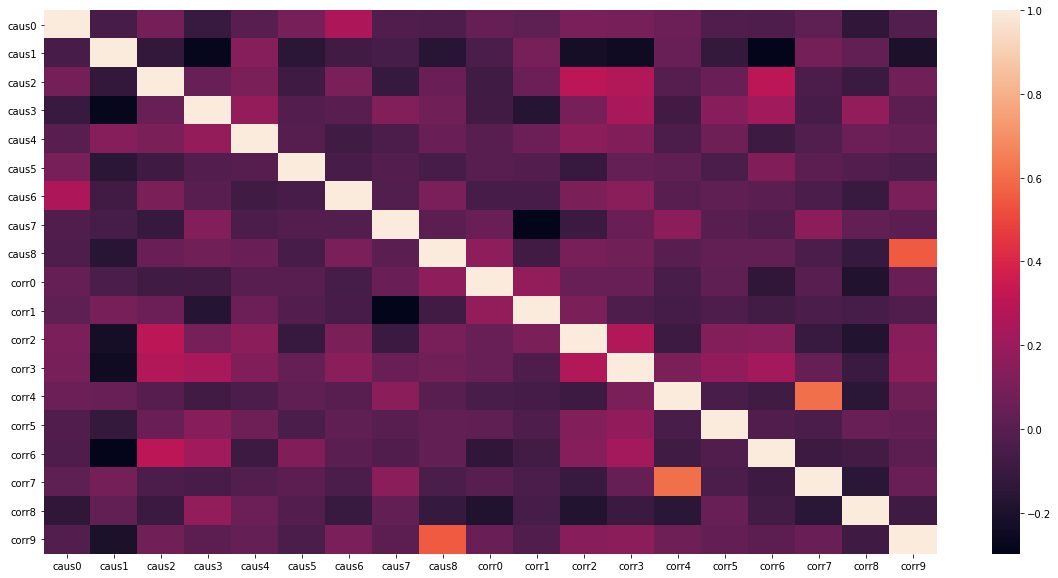

In [14]:
sns.heatmap(df.corr())

In [15]:
df.corr()

,caus0,caus1,caus2,caus3,caus4,caus5,caus6,caus7,caus8,corr0,corr1,corr2,corr3,corr4,corr5,corr6,corr7,corr8,corr9
caus0,1.000000,-0.052485,0.088494,-0.101836,0.005106,0.095162,0.258396,-0.029013,-0.034203,0.044030,0.021299,0.107253,0.095582,0.058252,-0.024547,-0.030064,0.017674,-0.133065,-0.019191
caus1,-0.052485,1.000000,-0.121379,-0.282573,0.138472,-0.150260,-0.073966,-0.058241,-0.159612,-0.041378,0.095161,-0.222916,-0.246272,0.047778,-0.119920,-0.288047,0.089685,0.026731,-0.206203
caus2,0.088494,-0.121379,1.000000,0.049979,0.112537,-0.084369,0.109416,-0.112622,0.056135,-0.079657,0.057878,0.301886,0.274779,-0.004295,0.055900,0.304270,-0.035185,-0.095593,0.079687
caus3,-0.101836,-0.282573,0.049979,1.000000,0.186569,-0.017772,-0.000506,0.132943,0.078205,-0.071268,-0.168909,0.096043,0.240203,-0.069868,0.144027,0.221049,-0.051168,0.182995,0.014770
caus4,0.005106,0.138472,0.112537,0.186569,1.000000,-0.007381,-0.076987,-0.038488,0.056107,0.005590,0.059313,0.153896,0.127873,-0.038578,0.062556,-0.087807,-0.020247,0.060672,0.037728
caus5,0.095162,-0.150260,-0.084369,-0.017772,-0.007381,1.000000,-0.050215,-0.016600,-0.050036,0.001188,-0.015319,-0.107883,0.040422,0.023561,-0.041039,0.127436,0.014066,-0.014113,-0.043108
caus6,0.258396,-0.073966,0.109416,-0.000506,-0.076987,-0.050215,1.000000,-0.019104,0.104514,-0.059312,-0.050342,0.108621,0.151563,0.003358,0.023270,0.007120,-0.042993,-0.104091,0.105659
caus7,-0.029013,-0.058241,-0.112622,0.132943,-0.038488,-0.016600,-0.019104,1.000000,0.010653,0.056922,-0.297922,-0.097035,0.056620,0.156965,0.005894,-0.028727,0.158402,0.027404,0.015272
caus8,-0.034203,-0.159612,0.056135,0.078205,0.056107,-0.050036,0.104514,0.010653,1.000000,0.166410,-0.073553,0.098462,0.075827,0.003663,0.031398,0.028918,-0.040004,-0.112950,0.550692
corr0,0.044030,-0.041378,-0.079657,-0.071268,0.005590,0.001188,-0.059312,0.056922,0.166410,1.000000,0.180078,0.050324,0.047885,-0.044425,0.024599,-0.133399,0.000619,-0.183535,0.053480


In [38]:
df

,caus0,caus1,caus2,caus3,caus4,caus5,caus6,caus7,caus8,corr0,corr1,corr2,corr3,corr4,corr5,corr6,corr7,corr8,corr9
16,-5.278854,10.111481,-0.486003,-9.869989,-13.014371,-9.413292,0.148731,2.721528,-10.760820,-2.698197,-4.681585,-7.824094,2.429982,-5.990024,-5.255343,-13.826973,-1.943027,6.184600,-15.775804
17,-2.927974,9.697466,0.346411,-12.663927,-6.269978,-13.700781,-0.575278,-0.408153,-12.714887,-4.957855,-1.156871,-11.272936,2.059068,-1.943027,-4.589926,-21.264517,-6.063921,9.528548,-12.271638
18,-6.515667,9.300309,11.874294,-11.894461,-11.547838,-6.220252,2.260779,-0.122292,-15.775804,-3.581042,-1.926728,-4.411907,-2.913566,-6.063921,1.458429,-20.147311,-3.026702,10.713586,-11.935809
19,-3.615150,6.464252,10.379464,-4.961556,-10.688161,-7.219466,0.475911,0.847508,-12.271638,-4.101384,-1.423962,2.516555,-11.795920,-3.026702,3.391049,-13.430613,3.323858,11.410042,-8.837235
20,-2.764311,9.159834,-1.788178,-6.864489,-9.362783,-7.517527,-9.743694,-3.608239,-11.935809,2.833674,3.995463,1.374535,-2.100632,3.323858,4.136915,-5.357243,7.547993,2.571724,-0.765283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2.551293,-2.136136,0.504892,-17.946613,-3.086408,-5.074096,-2.183739,-12.784574,5.074627,7.071366,9.530576,12.795432,8.388885,0.557484,1.497233,8.900013,-5.166102,-11.190755,3.338350
416,3.776886,-3.335470,0.163724,-18.577137,1.493507,5.903873,5.222600,-13.071912,5.808960,3.914347,7.933528,15.919591,6.222165,-5.166102,7.334140,9.060243,-7.149532,-12.274034,0.053230
417,1.430512,-4.688580,6.602839,-16.345269,3.325310,5.508795,2.774503,-12.075759,3.338350,0.818568,9.984722,6.496336,7.288739,-7.149532,12.819750,2.315612,-5.746555,-6.410530,3.352300
418,0.627683,-8.323340,14.969797,-7.025120,9.071801,3.487452,-6.777768,-9.150458,0.053230,4.569971,2.836355,4.215877,10.142039,-5.746555,11.864073,0.636735,5.054293,-5.361931,0.509139


In [42]:
x = np.arange(len(df))

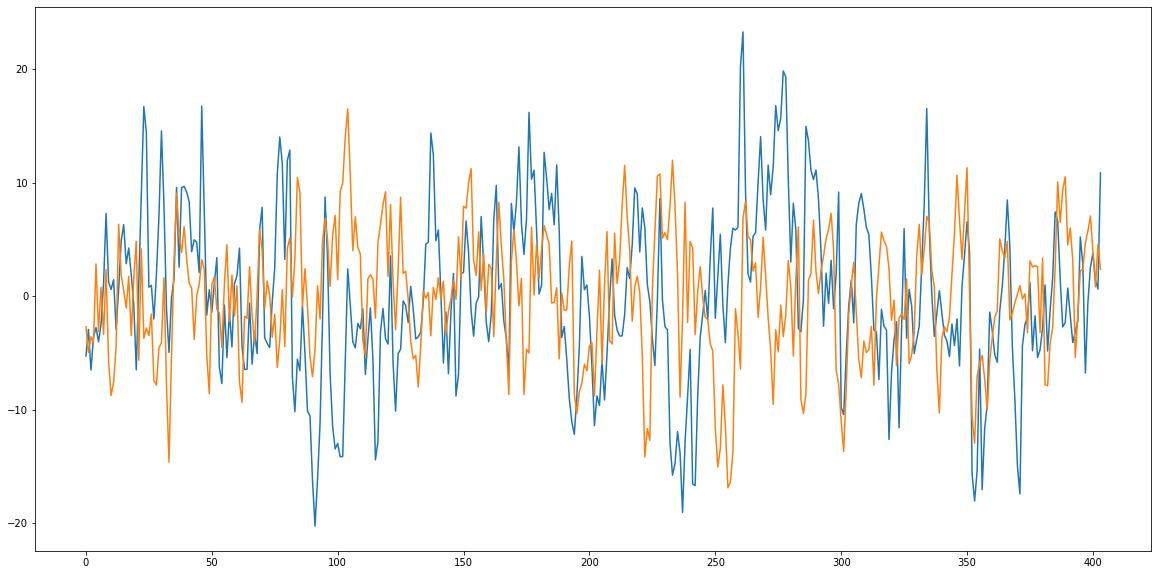

In [48]:
plt.plot(x,df.iloc[:,0],x, df.iloc[:,9])

In [9]:
def model_generator_V(count, data_sst, link, V, tau, ratio = 0.8, n_estimators=100, max_depth=5):
    
    start_lag = tau
    end_lag = tau+12
    
    df = pd.DataFrame({"drought":count})
    df = ff.shift_df(df, start_lag, end_lag)
    x_train = df.iloc[:,1:]
    y_train = df.iloc[:,0]
    base_model = RandomForestRegressor(max_depth=max_depth, random_state=0, n_estimators=n_estimators)
    base_model.fit(x_train, y_train)        
            
    df = pd.DataFrame({"drought": count})
    lags = np.arange(start_lag,end_lag + 1)
    df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in lags
    for col in df
    })
    for k in range(len(link)):
        df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
        df[str(k)] = df[str(k)].shift(abs(link[k,1]))
    df = df.dropna()
        
    x_train = df.iloc[:,1:]
    y_train = df.iloc[:,0]
    model = RandomForestRegressor(max_depth=max_depth, random_state=0, n_estimators=n_estimators)
    model.fit(x_train, y_train)
        
    return(base_model, model)

In [252]:
base, model = model_generator_V(original_count,data_sst, link_caus, V, tau)

In [9]:
train_start = 1961
validation_end = 1995

tau = 3

n_components_sst = 98

link_caus = np.load("../../whole_data_results/link_rotated_station/best_link_{}_{}_{}.npy".format(train_start, validation_end,tau))
link_corr = np.load("../../whole_data_results/link_rotated_station/best_link_corr_{}_{}_{}.npy".format(train_start, validation_end,tau))

temporal_limits = {"time_min":datetime(train_start, 1, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}
original_count, count = ff.drought_timeseries("../npy_files/ET_gamma_18912015.npy",train_start,validation_end)
data_sst, ts, V, df_sst, avg, std = ff.PCA_computer_rotated('../../../nc/sst.mnmean.nc', "sst",temporal_limits, n_components_sst, -9.96921e+36)

In [10]:
test_start = validation_end + 1
test_end = test_start + 4

temporal_limits_test = {"time_min":datetime(test_start, 1, 1, 0, 0),"time_max":datetime(test_end, 12, 1, 0, 0)}
data_sst_test = ff.data_generator_avg_std('../../../nc/sst.mnmean.nc', "sst",temporal_limits_test, avg, std, 12, -9.96921e+36)
original_count_test, count_test = ff.drought_timeseries("../npy_files/ET_gamma_18912015.npy",test_start,test_end)

In [223]:
np.save("data_sst.npy", data_sst)
np.save("V.npy", V)
np.save("ts.npy", ts)
np.save("avg.npy", avg)
np.save("std.npy", std)
np.save("data_sst_test.npy", data_sst_test)

In [8]:
df_sst.to_csv('df_sst.csv')

In [12]:
def prod(iterable):
    """
    Product of a sequence of numbers.
    Faster than np.prod for short lists like array shapes, and does
    not overflow if using Python integers.
    """
    product = 1
    for x in iterable:
        product *= x
    return product

def detrend(data, axis=-1, type='linear', bp=0, overwrite_data=False):
    
    if type not in ['linear', 'l', 'constant', 'c']:
        raise ValueError("Trend type must be 'linear' or 'constant'.")
    data = np.asarray(data)
    dtype = data.dtype.char
    if dtype not in 'dfDF':
        dtype = 'd'
    if type in ['constant', 'c']:
        ret = data - np.expand_dims(np.mean(data, axis), axis)
        return ret
    else:
        dshape = data.shape
        N = dshape[axis]
        bp = np.sort(np.unique(np.r_[0, bp, N]))
        if np.any(bp > N):
            raise ValueError("Breakpoints must be less than length "
                             "of data along given axis.")
        Nreg = len(bp) - 1
        # Restructure data so that axis is along first dimension and
        #  all other dimensions are collapsed into second dimension
        rnk = len(dshape)
        if axis < 0:
            axis = axis + rnk
        newdims = np.r_[axis, 0:axis, axis + 1:rnk]
        newdata = np.reshape(np.transpose(data, tuple(newdims)),
                             (N, prod(dshape) // N))
        nd = newdata.copy()
        if not overwrite_data:
            newdata = newdata.copy()  # make sure we have a copy
        if newdata.dtype.char not in 'dfDF':
            newdata = newdata.astype(dtype)
        # Find leastsq fit and remove it for each piece
        for m in range(Nreg):
            Npts = bp[m + 1] - bp[m]
            A = np.ones((Npts, 2), dtype)
            A[:, 0] = np.cast[dtype](np.arange(1, Npts + 1) * 1.0 / Npts)
            sl = slice(bp[m], bp[m + 1])
            coef, resids, rank, s = linalg.lstsq(A, newdata[sl])
            newdata[sl] = newdata[sl] - np.dot(A, coef)
        # Put data back in original shape.
        tdshape = np.take(dshape, newdims, 0)
        ret = np.reshape(newdata, tuple(tdshape))
        vals = list(range(1, rnk))
        olddims = vals[:axis] + [0] + vals[axis:]
        ret = np.transpose(ret, tuple(olddims))
        return(ret, coef)

In [13]:
original_count = np.array(original_count)

In [139]:
avg = original_count.mean()
std = original_count.std()
normal_count = (original_count - original_count.mean())/original_count.std()

In [14]:
count1, coef= detrend(original_count)

Npts = len(original_count) + len(original_count_test)
A = np.ones((Npts, 2))
A[:, 0] = np.arange(1, Npts + 1) * 1.0 / Npts
trend = np.ravel(np.dot(A,coef))

test_trend = trend[len(original_count):]

In [72]:
#test_trend_mean = np.mean(original_count)

In [15]:
link = link_caus

start_lag = tau
end_lag = tau+12

df = pd.DataFrame({"drought":count})
lags = np.arange(start_lag,end_lag + 1)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})
for k in range(len(link)):
    df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
    df[str(k)] = df[str(k)].shift(abs(link[k,1]))
df = df.dropna()

x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=500, min_samples_leaf = 50)
model.fit(x_train, y_train)

start_lag = tau
end_lag = tau + 12

count_test = original_count_test - test_trend
#normal_count_test = (original_count_test - avg)/std

df_test = pd.DataFrame({"drought":original_count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})
for k in range(len(link)):
    df_sst["pc"] = V[:,link[k,0]-1]
    df_test[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst_test)
    #df_test[str(k)] = ff.time_series_maker_V(data_sst_test, V[:,link[k,0]-1])
    df_test[str(k)] = df_test[str(k)].shift(abs(link[k,1]))
df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

y_pred = model.predict(x_test)

# Performance of causality

In [255]:
link = link_caus

In [259]:
start_lag = tau
end_lag = tau + 12

count_test = original_count_test - test_trend
#normal_count_test = (original_count_test - avg)/std

df_test = pd.DataFrame({"drought":original_count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})
for k in range(len(link)):
    df_sst["pc"] = V[:,link[k,0]-1]
    df_test[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst_test)
    #df_test[str(k)] = ff.time_series_maker_V(data_sst_test, V[:,link[k,0]-1])
    df_test[str(k)] = df_test[str(k)].shift(abs(link[k,1]))
df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

y_pred = model.predict(x_test)

In [228]:
y_test = y_test + test_trend[12 + tau:]
y_pred = y_pred + test_trend[12 + tau:]

In [16]:
math.sqrt(mean_squared_error(y_pred, y_test))

33.607390083157604

In [237]:
st.pearsonr(y_test, y_pred)

(0.4308467782718449, 0.003131411450904264)

In [190]:
#x = np.arange('2006-01', '2010-01', dtype='datetime64[M]')

In [232]:
x = np.arange(len(y_test))

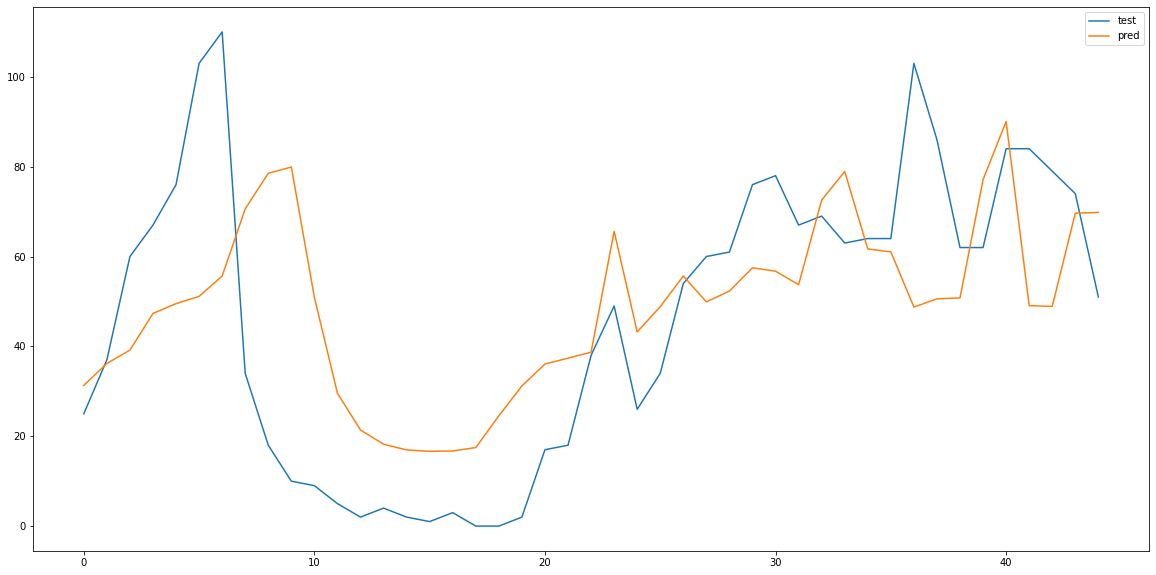

In [261]:
plt.plot(x, y_test, label = "test")
plt.plot(x, y_pred, label = "pred")
plt.legend()

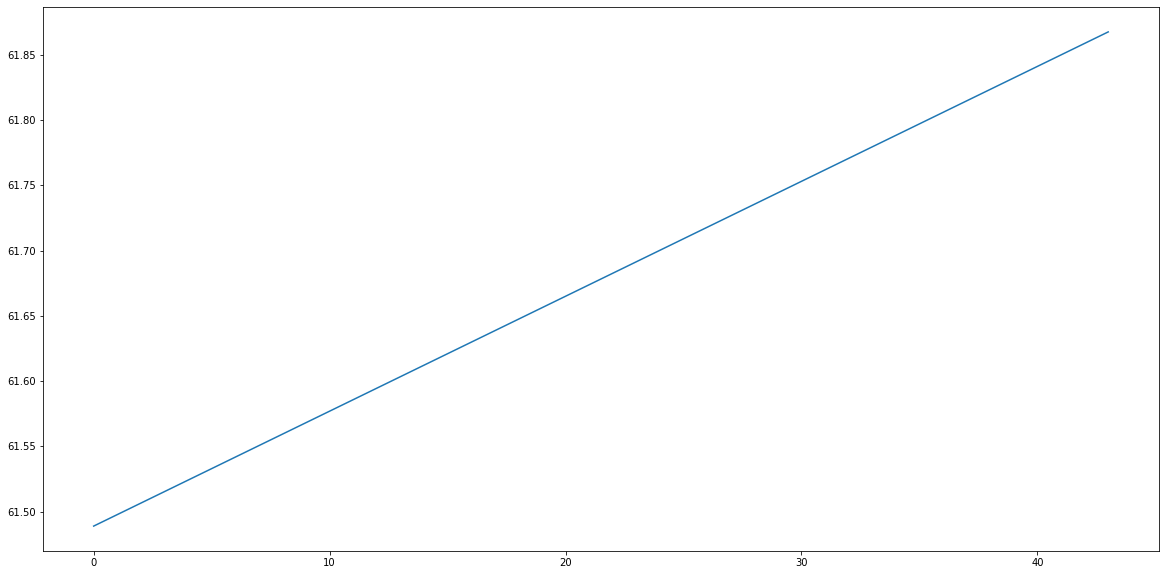

In [219]:
plt.plot(test_trend[12 + tau:])

# %10.963

In [223]:
st.pearsonr(y_test, y_pred)

(0.2370907552691527, 0.13058424484606992)

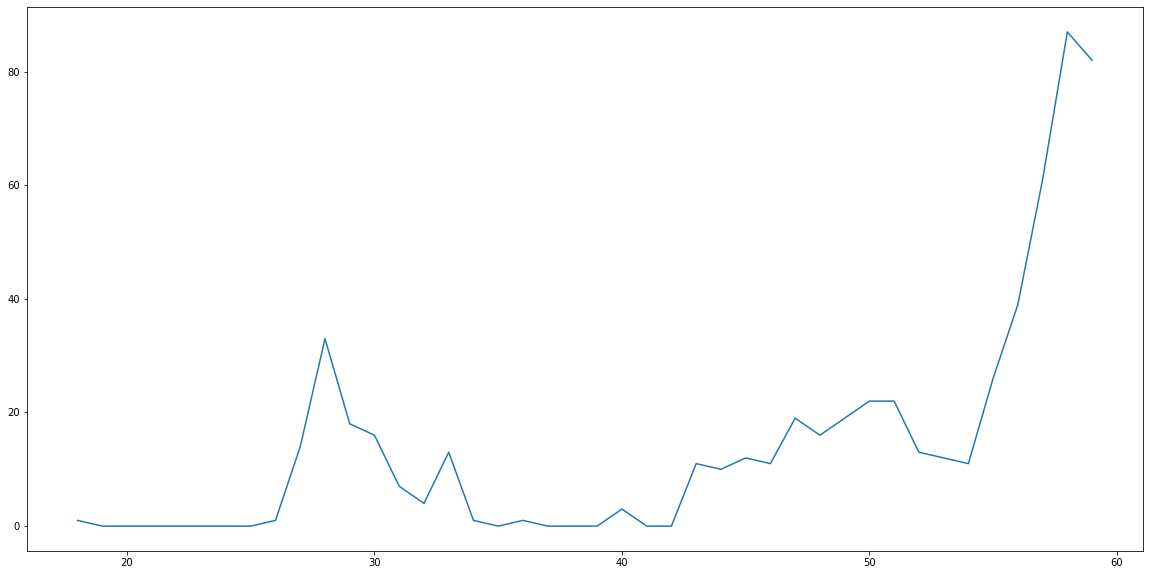

In [224]:
plt.plot(y_test)

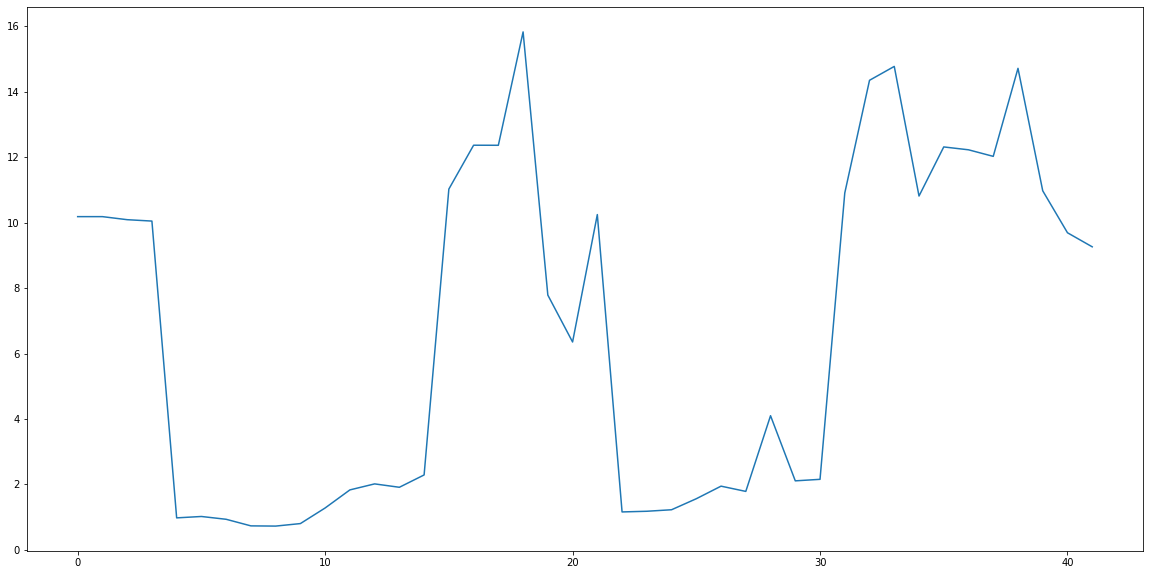

In [225]:
plt.plot(y_pred)

In [72]:
count1, coef= detrend(original_count)

In [109]:
Npts = len(original_count) + len(original_count_test)
A = np.ones((Npts, 2))
A[:, 0] = np.arange(1, Npts + 1) * 1.0 / Npts
trend = np.ravel(np.dot(A,coef))

In [110]:
test_trend = trend[len(original_count):]

In [15]:
data = np.array(original_count)

In [16]:
dtype = data.dtype.char

In [42]:
A[:,0] = np.arange(1, Npts + 1) * 1.0 / Npts

In [17]:
bp = 0

In [23]:
dshape = data.shape
N = dshape[-1]
bp = np.sort(np.unique(np.r_[0, bp, N]))

In [201]:
Nreg = len(bp) - 1

In [28]:
m= 0

In [217]:
coef, resids, rank, s = linalg.lstsq(A, newdata[sl])

NameError: name 'newdata' is not defined

In [189]:



# Restructure data so that axis is along first dimension and
#  all other dimensions are collapsed into second dimension
rnk = len(dshape)
if axis < 0:
    axis = axis + rnk

NameError: name 'axis' is not defined

480

In [ ]:
A = np.ones((Npts, 2), dtype)

In [183]:
from scipy._lib._util import prod as _prod

ImportError: cannot import name 'prod'

In [220]:
c, coef = detrend(original_count)

In [226]:
c = (original_count - np.dot(A,coef))

In [231]:
count.shape

(420,)

In [232]:
d = np.dot(A,coef)

In [162]:
import statsmodels.api as sm

In [168]:
X = np.arange(1,len(original_count)+1)

In [169]:
model = sm.OLS(original_count, X)

In [170]:
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.472
Model:                            OLS   Adj. R-squared (uncentered):              0.471
Method:                 Least Squares   F-statistic:                              375.3
Date:                Mon, 22 Feb 2021   Prob (F-statistic):                    3.64e-60
Time:                        11:27:42   Log-Likelihood:                         -2212.7
No. Observations:                 420   AIC:                                      4427.
Df Residuals:                     419   BIC:                                      4431.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [177]:
count1 = original_count - results.params[0] * X

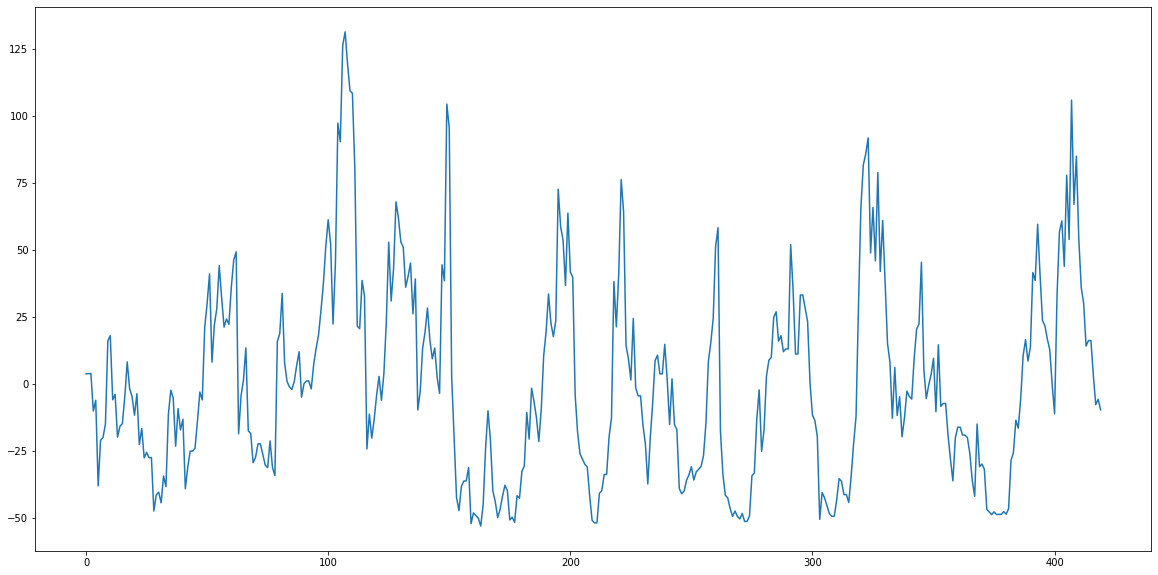

In [179]:
plt.plot(count)

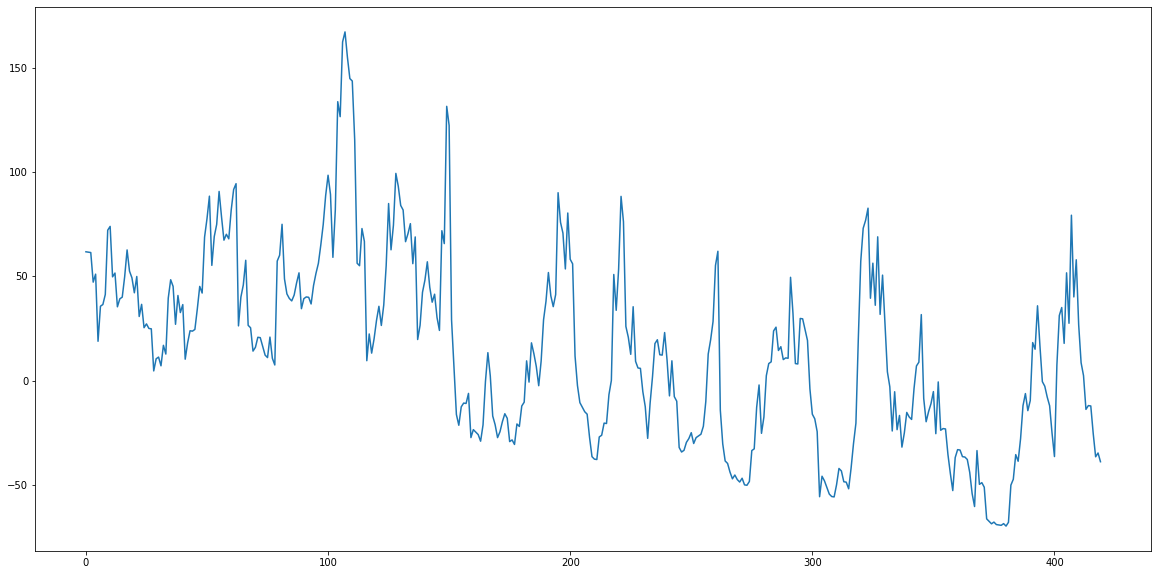

In [180]:
plt.plot(count1)

In [199]:
link = link_corr

start_lag = tau
end_lag = tau+12

df = pd.DataFrame({"drought": count})
lags = np.arange(start_lag,end_lag + 1)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})
for k in range(len(link)):
    df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
    df[str(k)] = df[str(k)].shift(abs(link[k,1]))
df = df.dropna()

x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
model.fit(x_train, y_train)


start_lag = tau
end_lag = tau + 12

df_test = pd.DataFrame({"drought":original_count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})
for k in range(len(link)):
    #df_sst["pc"] = V[:,link[k,0]-1]
    #df_test[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst_test)
    df_test[str(k)] = ff.time_series_maker_V(data_sst_test, V[:,link[k,0]-1])
    df_test[str(k)] = df_test[str(k)].shift(abs(link[k,1]))
df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

y_pred = model.predict(x_test)

# Performance of correlation

In [200]:
math.sqrt(mean_squared_error(y_pred, y_test))

25.118031797074526

# %9.84

# hybrid method

In [18]:
for i in range(len(link_corr)):
    if not np.array(link_corr == list(link_corr[i])).all(axis=1).all():
        link_caus = np.concatenate((link_caus, np.reshape(link_corr[i,:],(1,2))))
link_hybrid = link_caus
link_caus = np.load("../../whole_data_results/link_rotated_station/best_link_1976_2010_{}.npy".format(tau))

In [19]:
l, b, m = ff.forward_feature_V(count, data_sst, link_hybrid, V, tau)

link = l

start_lag = tau
end_lag = tau + 12

df_test = pd.DataFrame({"drought":count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})
for k in range(len(link)):
    df_sst["pc"] = V[:,link[k,0]-1]
    df_test[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst_test)
    df_test[str(k)] = df_test[str(k)].shift(abs(link[k,1]))
df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]


In [20]:
y_pred = m.predict(x_test)

In [21]:
math.sqrt(mean_squared_error(y_pred, y_test))

26.183166379517324

In [22]:
st.pearsonr(y_test, y_pred)

(0.5876464452292093, 2.1944563792533203e-05)

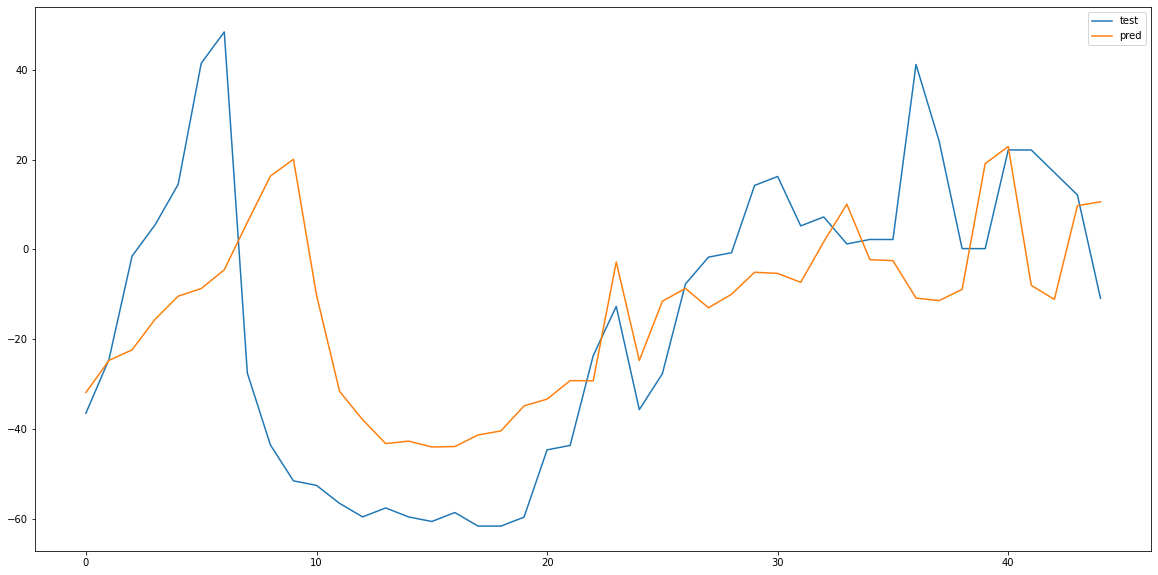

In [23]:

x = np.arange('2006-01', '2010-01', dtype='datetime64[M]')

x = np.arange(len(y_test))

plt.plot(x, y_test, label = "test")
plt.plot(x, y_pred, label = "pred")
plt.legend()

In [205]:
l

array([[ 18,  -5],
       [ 15, -14],
       [  4,  -4],
       [ 28, -14],
       [ 86,  -7],
       [ 13, -15],
       [ 27, -11],
       [ 77, -16]])

In [206]:
link_caus

array([[ 66,  -4],
       [ 13, -12],
       [ 22,  -7],
       [ 71,  -4],
       [ 86,  -9],
       [ 93, -14]])

In [207]:
link_corr

array([[ 18,  -5],
       [  4,  -4],
       [ 15, -14],
       [ 28, -14],
       [ 86,  -7],
       [ 21,  -8],
       [ 13, -15],
       [ 27, -11],
       [ 77, -16]])

# %7.29

In [148]:
base.iloc[:,1:]

,drought (t-6),drought (t-7),drought (t-8),drought (t-9),drought (t-10),drought (t-11),drought (t-12),drought (t-13),drought (t-14),drought (t-15),...,drought (t-17),drought (t-18),10,3,2,0,16,17,7,12
18,-3.986851,-6.011908,17.963035,15.937978,-15.087079,-20.112136,-21.137193,-38.162250,-6.187307,-10.212364,...,3.737522,3.712465,-1.926728,-11.894461,11.874294,-6.515667,-3.026702,10.713586,-0.122292,-2.913566
19,-19.961794,-3.986851,-6.011908,17.963035,15.937978,-15.087079,-20.112136,-21.137193,-38.162250,-6.187307,...,3.762579,3.737522,-1.423962,-4.961556,10.379464,-3.615150,3.323858,11.410042,0.847508,-11.795920
20,-15.936737,-19.961794,-3.986851,-6.011908,17.963035,15.937978,-15.087079,-20.112136,-21.137193,-38.162250,...,-10.212364,3.762579,3.995463,-6.864489,-1.788178,-2.764311,7.547993,2.571724,-3.608239,-2.100632
21,-14.911680,-15.936737,-19.961794,-3.986851,-6.011908,17.963035,15.937978,-15.087079,-20.112136,-21.137193,...,-6.187307,-10.212364,5.664084,-5.884265,2.087809,-4.025354,10.048280,-3.367842,9.811284,-1.848309
22,-4.886623,-14.911680,-15.936737,-19.961794,-3.986851,-6.011908,17.963035,15.937978,-15.087079,-20.112136,...,-38.162250,-6.187307,3.705377,-1.955132,-2.897942,-2.467984,2.729116,-2.428674,9.682757,-6.172428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,84.960775,66.935718,105.910661,53.885604,77.860547,43.835490,60.810433,56.785376,32.760319,-11.264738,...,12.685148,16.660091,9.530576,-17.946613,0.504892,2.551293,-5.166102,-11.190755,-12.784574,8.388885
416,53.985832,84.960775,66.935718,105.910661,53.885604,77.860547,43.835490,60.810433,56.785376,32.760319,...,-0.289795,12.685148,7.933528,-18.577137,0.163724,3.776886,-7.149532,-12.274034,-13.071912,6.222165
417,36.010889,53.985832,84.960775,66.935718,105.910661,53.885604,77.860547,43.835490,60.810433,56.785376,...,-11.264738,-0.289795,9.984722,-16.345269,6.602839,1.430512,-5.746555,-6.410530,-12.075759,7.288739
418,30.035946,36.010889,53.985832,84.960775,66.935718,105.910661,53.885604,77.860547,43.835490,60.810433,...,32.760319,-11.264738,2.836355,-7.025120,14.969797,0.627683,5.054293,-5.361931,-9.150458,10.142039


In [149]:
x_train

,drought (t-6),drought (t-7),drought (t-8),drought (t-9),drought (t-10),drought (t-11),drought (t-12),drought (t-13),drought (t-14),drought (t-15),...,drought (t-17),drought (t-18),0,1,2,3,4,5,6,7
18,54.0,52.0,76.0,74.0,43.0,38.0,37.0,20.0,52.0,48.0,...,62.0,62.0,-1.926728,-11.894461,11.874294,-6.515667,-3.026702,10.713586,-0.122292,-2.913566
19,38.0,54.0,52.0,76.0,74.0,43.0,38.0,37.0,20.0,52.0,...,62.0,62.0,-1.423962,-4.961556,10.379464,-3.615150,3.323858,11.410042,0.847508,-11.795920
20,42.0,38.0,54.0,52.0,76.0,74.0,43.0,38.0,37.0,20.0,...,48.0,62.0,3.995463,-6.864489,-1.788178,-2.764311,7.547993,2.571724,-3.608239,-2.100632
21,43.0,42.0,38.0,54.0,52.0,76.0,74.0,43.0,38.0,37.0,...,52.0,48.0,5.664084,-5.884265,2.087809,-4.025354,10.048280,-3.367842,9.811284,-1.848309
22,53.0,43.0,42.0,38.0,54.0,52.0,76.0,74.0,43.0,38.0,...,20.0,52.0,3.705377,-1.955132,-2.897942,-2.467984,2.729116,-2.428674,9.682757,-6.172428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,133.0,115.0,154.0,102.0,126.0,92.0,109.0,105.0,81.0,37.0,...,61.0,65.0,9.530576,-17.946613,0.504892,2.551293,-5.166102,-11.190755,-12.784574,8.388885
416,102.0,133.0,115.0,154.0,102.0,126.0,92.0,109.0,105.0,81.0,...,48.0,61.0,7.933528,-18.577137,0.163724,3.776886,-7.149532,-12.274034,-13.071912,6.222165
417,84.0,102.0,133.0,115.0,154.0,102.0,126.0,92.0,109.0,105.0,...,37.0,48.0,9.984722,-16.345269,6.602839,1.430512,-5.746555,-6.410530,-12.075759,7.288739
418,78.0,84.0,102.0,133.0,115.0,154.0,102.0,126.0,92.0,109.0,...,81.0,37.0,2.836355,-7.025120,14.969797,0.627683,5.054293,-5.361931,-9.150458,10.142039


In [145]:
link = l

start_lag = tau
end_lag = tau+12

df = pd.DataFrame({"drought": original_count})
lags = np.arange(start_lag,end_lag + 1)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})
for k in range(len(link)):
    df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
    df[str(k)] = df[str(k)].shift(abs(link[k,1]))
df = df.dropna()

x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]


df_test = pd.DataFrame({"drought":original_count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})
for k in range(len(link)):
    df_sst["pc"] = V[:,link[k,0]-1]
    df_test[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst_test)
    df_test[str(k)] = df_test[str(k)].shift(abs(link[k,1]))
df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

In [133]:
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [134]:
math.sqrt(mean_squared_error(y_pred, y_test))

38.77813703833992

In [90]:
start_lag = tau
end_lag = tau+12

df = pd.DataFrame({"drought": original_count})
lags = np.arange(start_lag,end_lag + 1)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})
df = df.dropna()

x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]


model = RandomForestRegressor()
model.fit(x_train, y_train)

df_test = pd.DataFrame({"drought":original_count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})

df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

y_pred = model.predict(x_test)

In [91]:
math.sqrt(mean_squared_error(y_pred, y_test))

55.29795699317514

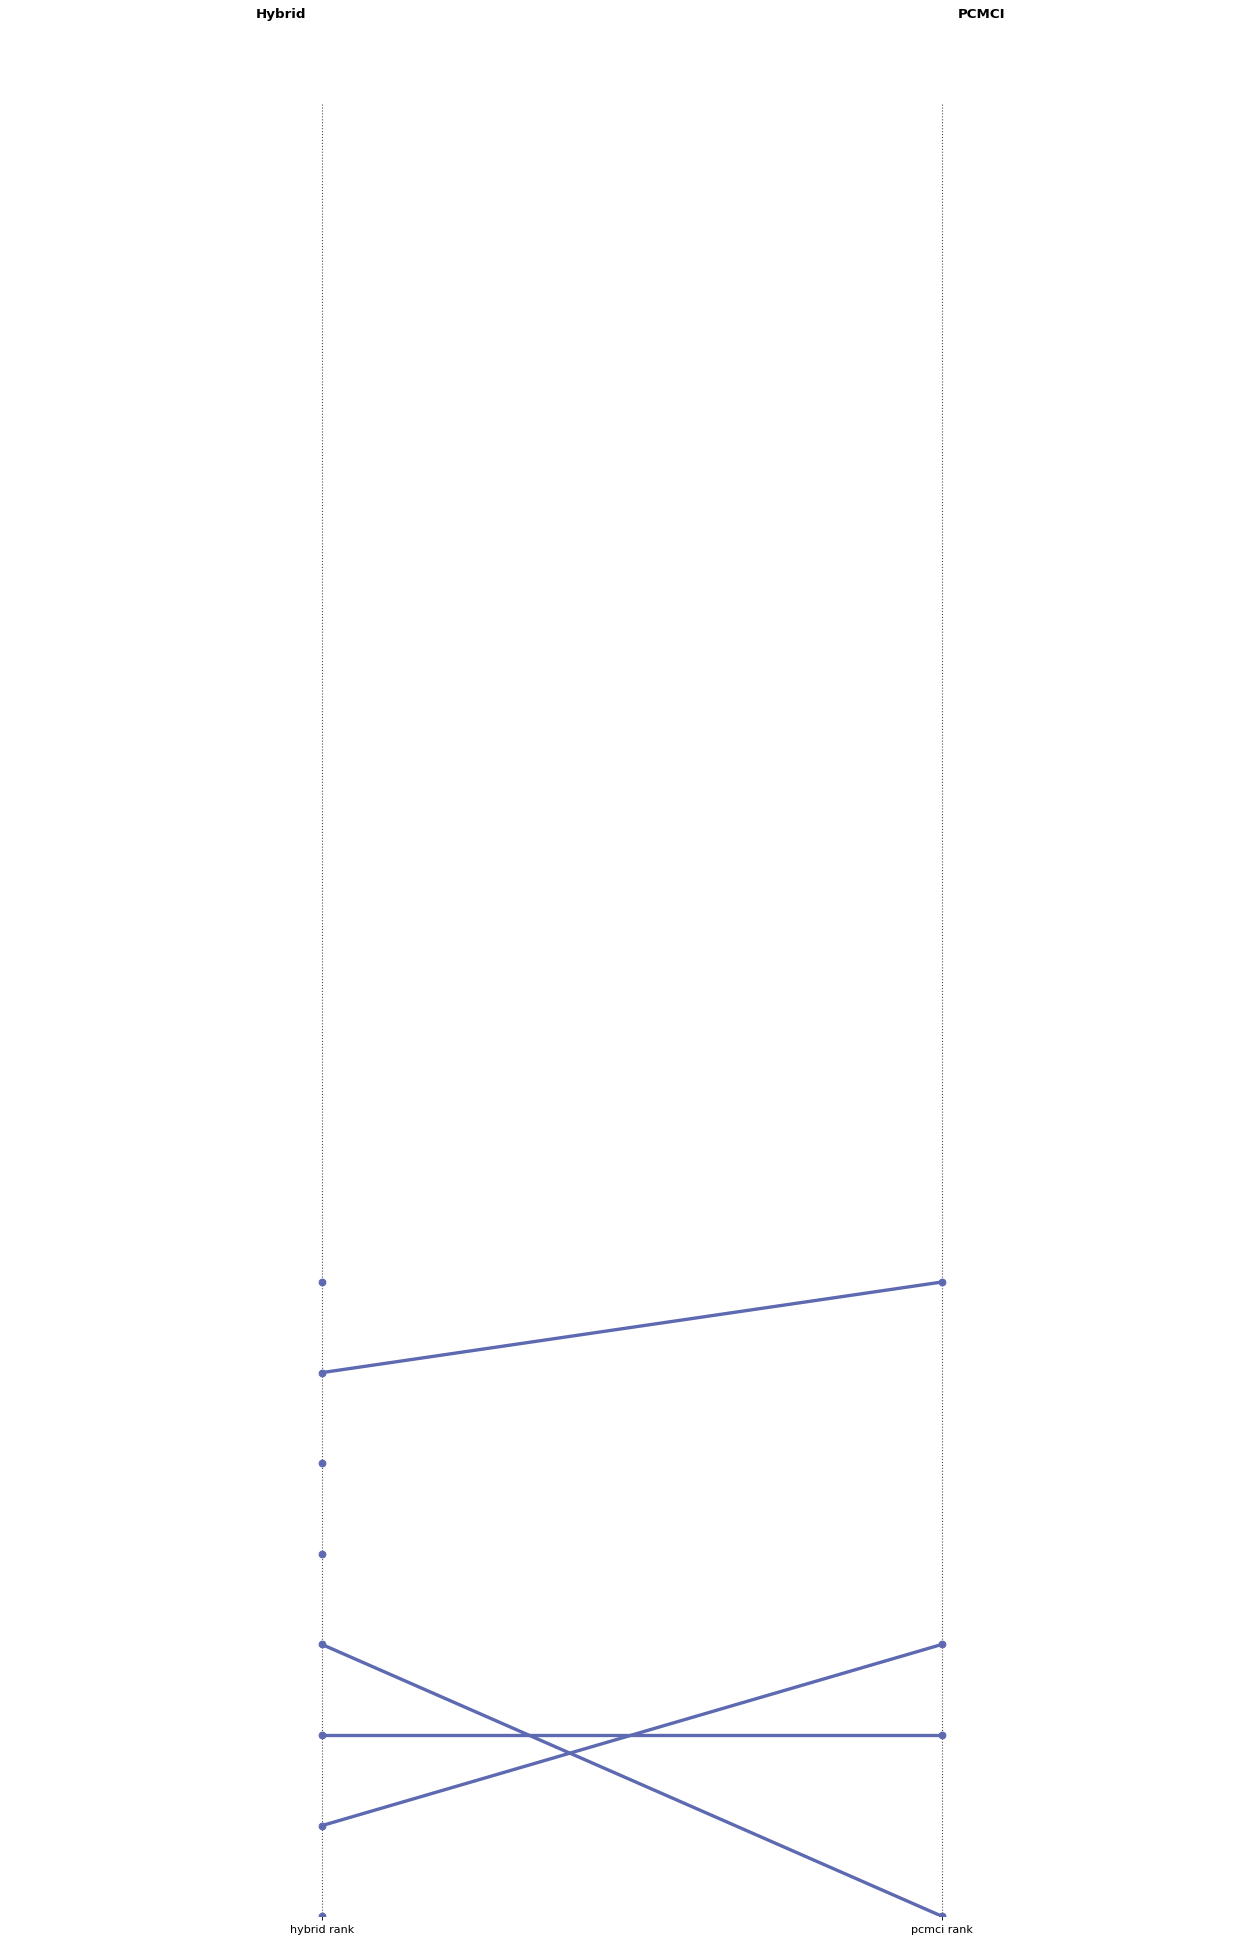

In [193]:
rank = []
for i in range(len(l)):
    if len(np.where((link_caus == list(l[i])).all(axis=1))[0]) > 0:
        rank.append(np.where((link_caus == list(l[i])).all(axis=1))[0][0])
    else:
        rank.append(np.nan)

ranks_merged = pd.DataFrame({'hybrid_rank':np.arange(len(l)), 'parcorr_rank':rank})

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from palettable.cartocolors.qualitative import Vivid_4
from matplotlib.lines import Line2D 


def newline(p1, p2, color='black'):
    ax = plt.gca()
    if p1[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[1], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    elif p2[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[0], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    else:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='gray', marker='o', markersize=6, alpha=0.7)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(20,30), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=ranks_merged['hybrid_rank'], x=np.repeat(1, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=ranks_merged['parcorr_rank'], x=np.repeat(3, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
p1_count = 167
p2_count = 166
for p1, p2 in zip(ranks_merged['hybrid_rank'], ranks_merged['parcorr_rank']):
    newline([1,p1], [3,p2])
#    if p1>159:
#        ax.text(1-0.05, p1_count, c , horizontalalignment='right', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[1])
#        p1_count-=1.5
#    if p2>159:
#        ax.text(3+0.05, p2_count, c , horizontalalignment='left', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[0])
#        p2_count-=1.5

# top Annotations
ax.text(1-0.05, 21, 'Hybrid', horizontalalignment='right', verticalalignment='center', fontdict={'size':12, 'weight':700})
ax.text(3+0.05, 21, 'PCMCI', horizontalalignment='left', verticalalignment='center', fontdict={'size':12, 'weight':700})

# Decoration
#ax.set_title("Variable Ranks", fontdict={'size':10})
ax.set(xlim=(0,4), ylim=(0,20))
ax.set_xticks([1,3])
ax.set_xticklabels(["hybrid rank","pcmci rank" ])
plt.yticks([])

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

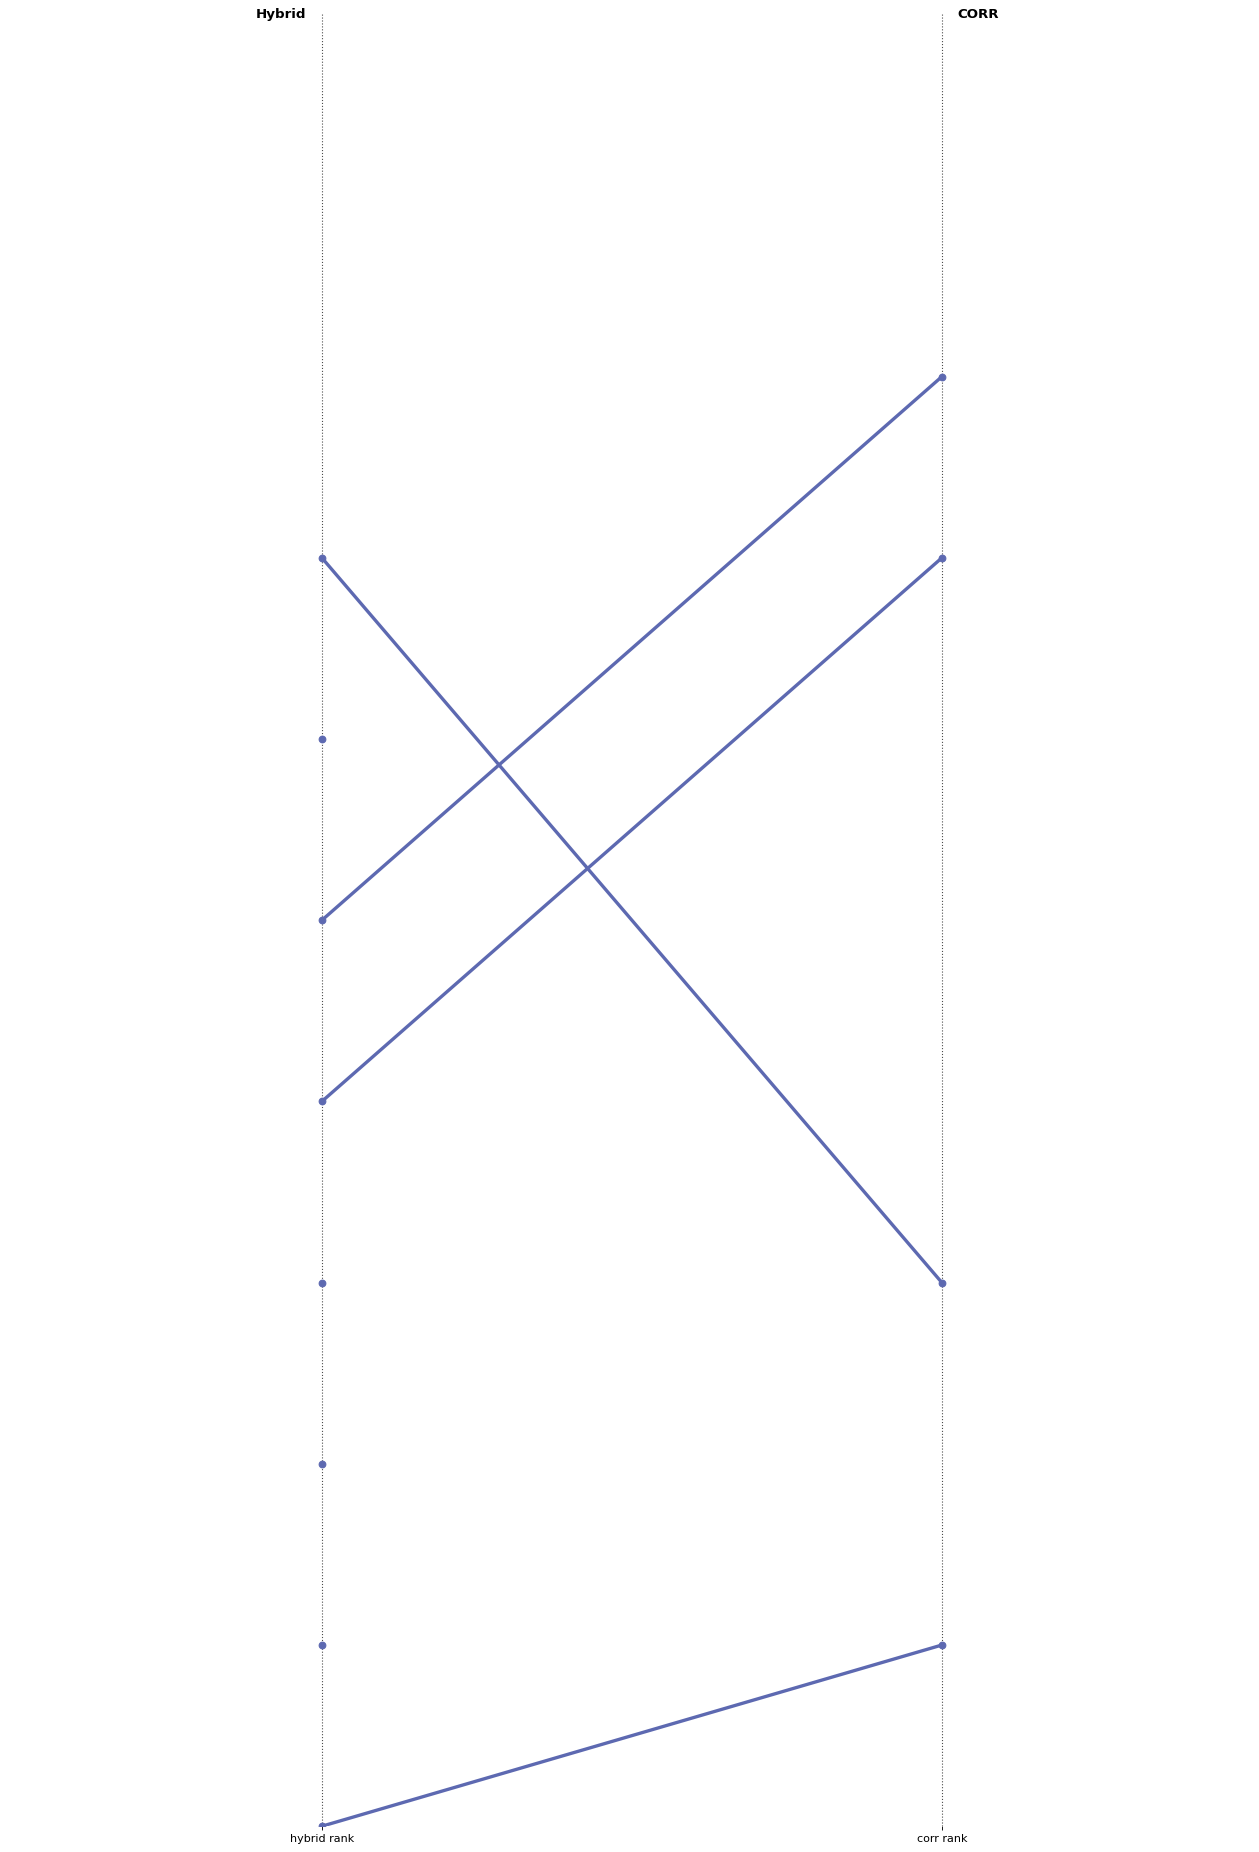

In [195]:
rank = []
for i in range(len(l)):
    if len(np.where((link_corr == list(l[i])).all(axis=1))[0]) > 0:
        rank.append(np.where((link_corr == list(l[i])).all(axis=1))[0][0])
    else:
        rank.append(np.nan)

ranks_merged = pd.DataFrame({'hybrid_rank':np.arange(len(l)), 'corr_rank':rank})

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from palettable.cartocolors.qualitative import Vivid_4
from matplotlib.lines import Line2D 


def newline(p1, p2, color='black'):
    ax = plt.gca()
    if p1[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[1], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    elif p2[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[0], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    else:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='gray', marker='o', markersize=6, alpha=0.7)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(20,30), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=0, ymax=10, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=10, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=ranks_merged['hybrid_rank'], x=np.repeat(1, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=ranks_merged['corr_rank'], x=np.repeat(3, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
p1_count = 167
p2_count = 166
for p1, p2 in zip(ranks_merged['hybrid_rank'], ranks_merged['corr_rank']):
    newline([1,p1], [3,p2])
#    if p1>159:
#        ax.text(1-0.05, p1_count, c , horizontalalignment='right', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[1])
#        p1_count-=1.5
#    if p2>159:
#        ax.text(3+0.05, p2_count, c , horizontalalignment='left', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[0])
#        p2_count-=1.5

# top Annotations
ax.text(1-0.05, 10, 'Hybrid', horizontalalignment='right', verticalalignment='center', fontdict={'size':12, 'weight':700})
ax.text(3+0.05, 10, 'CORR', horizontalalignment='left', verticalalignment='center', fontdict={'size':12, 'weight':700})

# Decoration
#ax.set_title("Variable Ranks", fontdict={'size':10})
ax.set(xlim=(0,4), ylim=(0,10))
ax.set_xticks([1,3])
ax.set_xticklabels(["hybrid rank","corr rank" ])
plt.yticks([])

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

In [70]:
link = np.load("./link_rotated_station/link_corr_1976_2010_{}.npy".format(tau))

In [71]:
link = link[np.random.randint(link.shape[0], size=10), :]

start_lag = tau
end_lag = tau+12

df = pd.DataFrame({"drought": original_count})
lags = np.arange(start_lag,end_lag + 1)
df = df.assign(**{
'{} (t-{})'.format(col, t): df[col].shift(t)
for t in lags
for col in df
})
for k in range(len(link)):
    df[str(k)] = ff.time_series_maker_V(data_sst, V[:,link[k,0]-1])
    df[str(k)] = df[str(k)].shift(abs(link[k,1]))
df = df.dropna()

x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]
model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=500, min_samples_leaf = 50)
model.fit(x_train, y_train)


start_lag = tau
end_lag = tau + 12

df_test = pd.DataFrame({"drought":original_count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})
for k in range(len(link)):
    df_sst["pc"] = V[:,link[k,0]-1]
    df_test[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst_test)
    df_test[str(k)] = df_test[str(k)].shift(abs(link[k,1]))
df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

y_pred = model.predict(x_test)

In [72]:
math.sqrt(mean_squared_error(y_pred, y_test))/303

0.0661025986170915

In [111]:
l,b, m = ff.forward_feature_V(count, data_sst, link_caus, V, tau)

In [115]:
link = l

In [117]:
start_lag = tau
end_lag = tau + 12

df_test = pd.DataFrame({"drought":original_count_test})
lags = np.arange(start_lag,end_lag + 1)
df_test = df_test.assign(**{
'{} (t-{})'.format(col, t): df_test[col].shift(t)
for t in lags
for col in df_test
})
for k in range(len(link)):
    df_sst["pc"] = V[:,link[k,0]-1]
    df_test[str(k)] = ff.time_series_maker(link[k,0]-1, df_sst, data_sst_test)
    df_test[str(k)] = df_test[str(k)].shift(abs(link[k,1]))
df_test = df_test.dropna()

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

y_pred = m.predict(x_test)

In [118]:
math.sqrt(mean_squared_error(y_pred, y_test))/303

0.059864601857609626

In [119]:
l

array([[ 22,  -3],
       [ 93, -13],
       [ 11, -14],
       [ 14, -15],
       [ 66, -13],
       [ 12,  -9]])

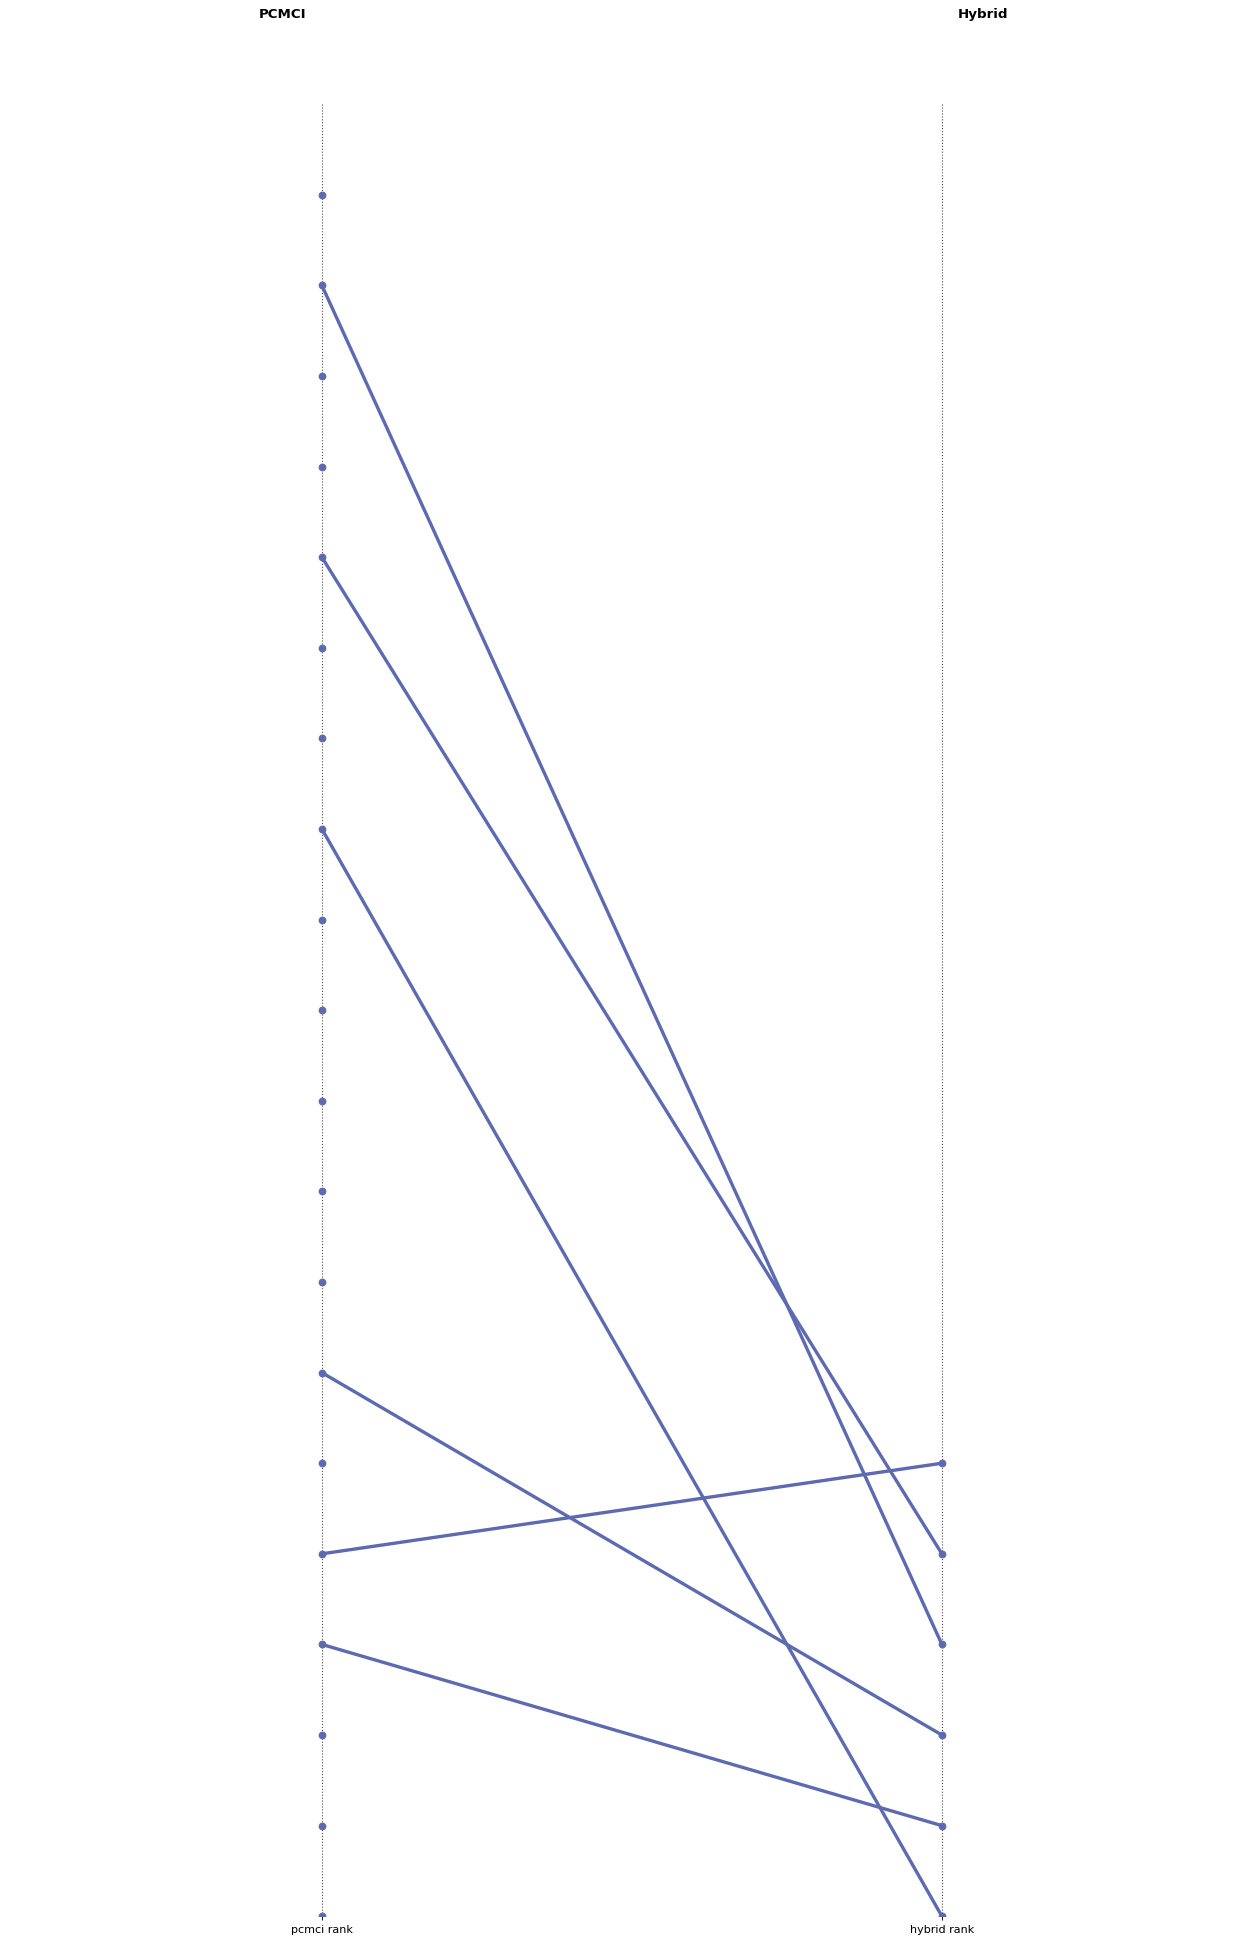

In [125]:
rank = []
for i in range(len(link_caus)):
    if len(np.where((l == list(link_caus[i])).all(axis=1))[0]) > 0:
        rank.append(np.where((l == list(link_caus[i])).all(axis=1))[0][0])
    else:
        rank.append(np.nan)

ranks_merged = pd.DataFrame({'parcorr_rank':np.arange(len(link_caus)), 'hybrid_rank':rank})

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from palettable.cartocolors.qualitative import Vivid_4
from matplotlib.lines import Line2D 


def newline(p1, p2, color='black'):
    ax = plt.gca()
    if p1[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[1], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    elif p2[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[0], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    else:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='gray', marker='o', markersize=6, alpha=0.7)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(20,30), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=ranks_merged['parcorr_rank'], x=np.repeat(1, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=ranks_merged['hybrid_rank'], x=np.repeat(3, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
p1_count = 167
p2_count = 166
for p1, p2 in zip(ranks_merged['parcorr_rank'], ranks_merged['hybrid_rank']):
    newline([1,p1], [3,p2])
#    if p1>159:
#        ax.text(1-0.05, p1_count, c , horizontalalignment='right', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[1])
#        p1_count-=1.5
#    if p2>159:
#        ax.text(3+0.05, p2_count, c , horizontalalignment='left', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[0])
#        p2_count-=1.5

# top Annotations
ax.text(1-0.05, 21, 'PCMCI', horizontalalignment='right', verticalalignment='center', fontdict={'size':12, 'weight':700})
ax.text(3+0.05, 21, 'Hybrid', horizontalalignment='left', verticalalignment='center', fontdict={'size':12, 'weight':700})

# Decoration
#ax.set_title("Variable Ranks", fontdict={'size':10})
ax.set(xlim=(0,4), ylim=(0,20))
ax.set_xticks([1,3])
ax.set_xticklabels(["pcmci rank", "hybrid rank"])
plt.yticks([])

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

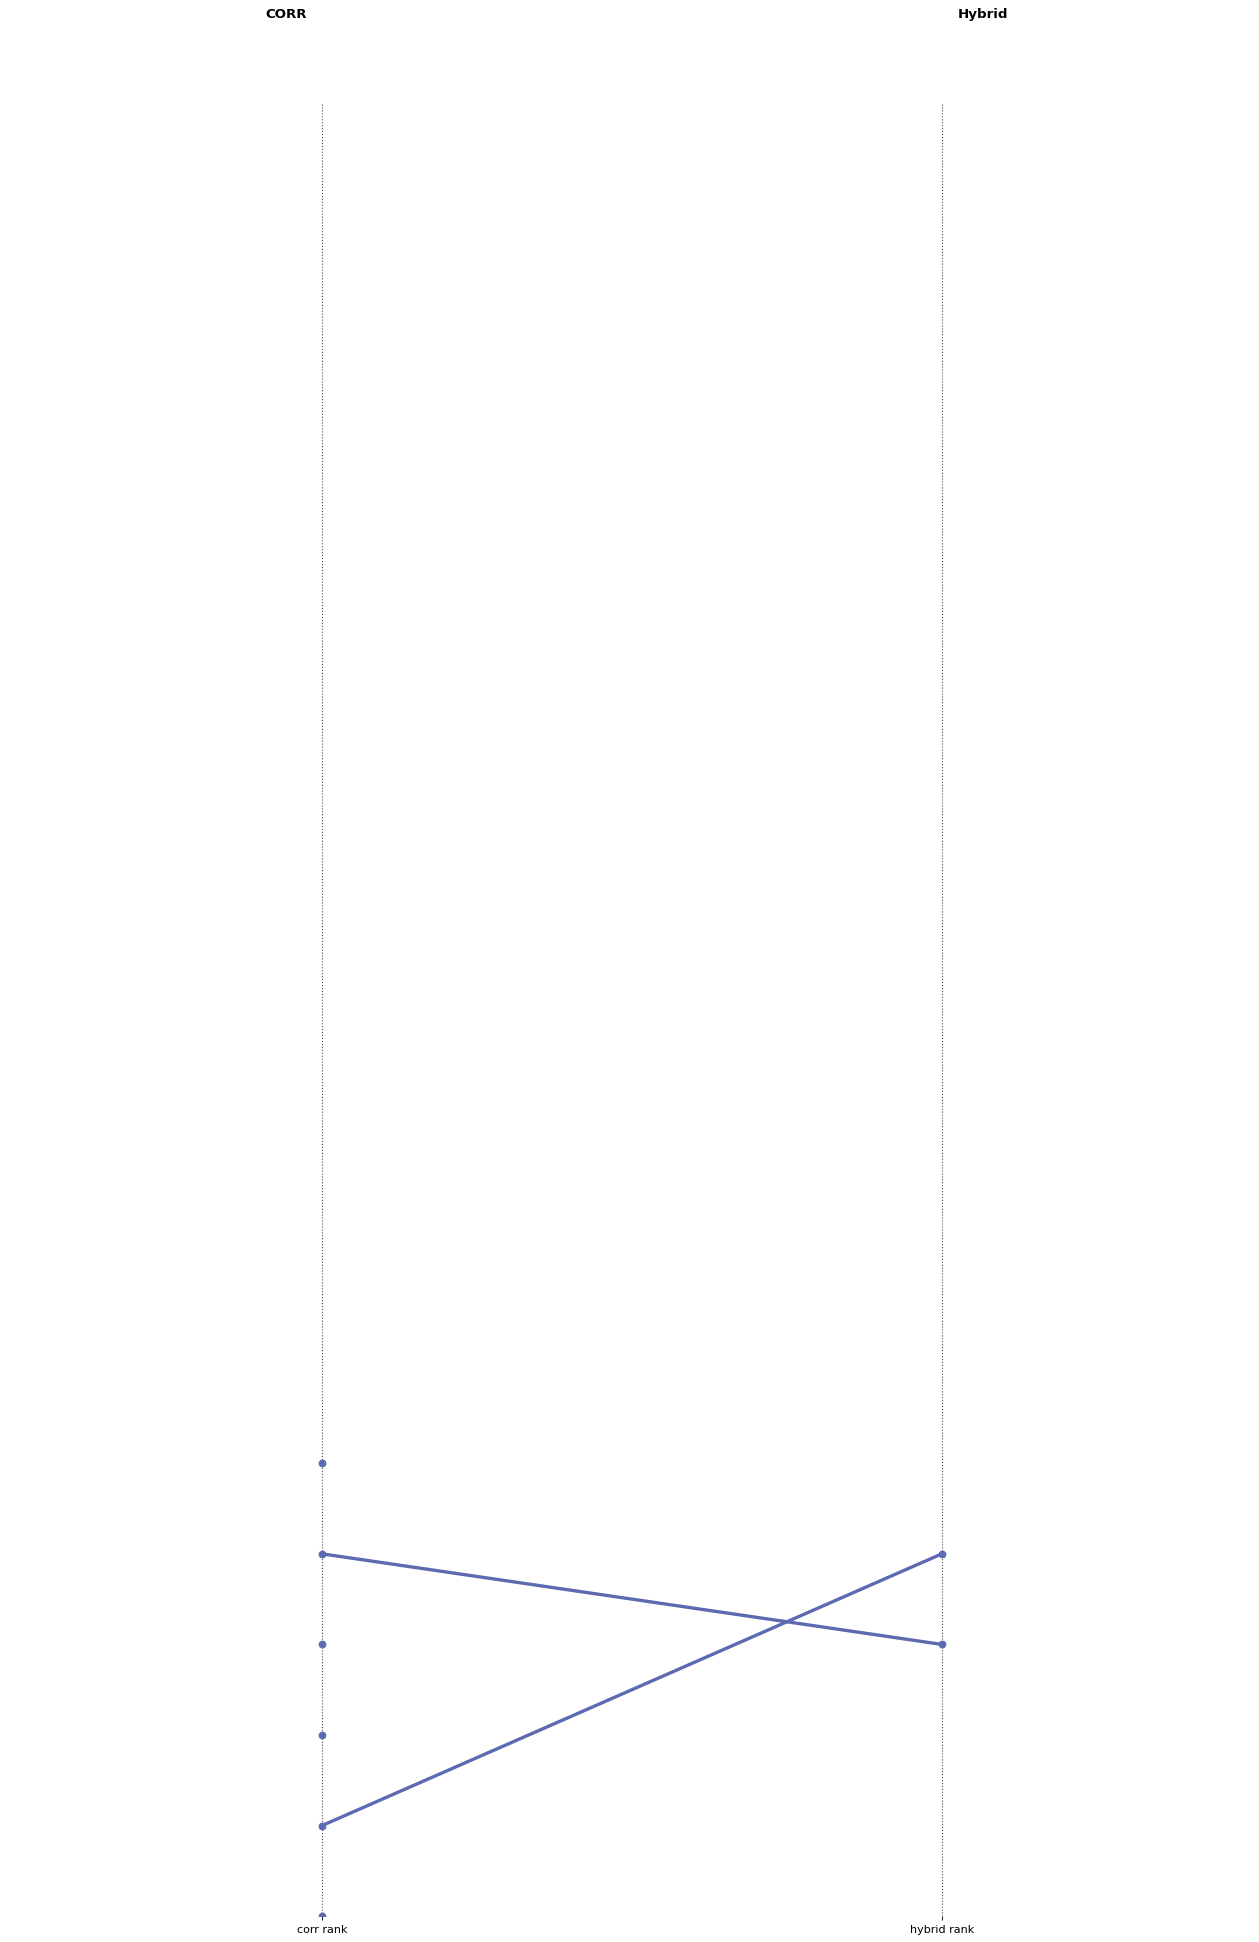

In [127]:
rank = []
for i in range(len(link_corr)):
    if len(np.where((l == list(link_corr[i])).all(axis=1))[0]) > 0:
        rank.append(np.where((l == list(link_corr[i])).all(axis=1))[0][0])
    else:
        rank.append(np.nan)

ranks_merged = pd.DataFrame({'corr_rank':np.arange(len(link_corr)), 'hybrid_rank':rank})

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from palettable.cartocolors.qualitative import Vivid_4
from matplotlib.lines import Line2D 


def newline(p1, p2, color='black'):
    ax = plt.gca()
    if p1[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[1], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    elif p2[1] < 20:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=Vivid_4.mpl_colors[0], 
                          marker='o', markersize=6, alpha=1, linewidth=3)
    else:
        l = Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='gray', marker='o', markersize=6, alpha=0.7)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(20,30), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=20, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=ranks_merged['corr_rank'], x=np.repeat(1, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=ranks_merged['hybrid_rank'], x=np.repeat(3, ranks_merged.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
p1_count = 167
p2_count = 166
for p1, p2 in zip(ranks_merged['corr_rank'], ranks_merged['hybrid_rank']):
    newline([1,p1], [3,p2])
#    if p1>159:
#        ax.text(1-0.05, p1_count, c , horizontalalignment='right', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[1])
#        p1_count-=1.5
#    if p2>159:
#        ax.text(3+0.05, p2_count, c , horizontalalignment='left', verticalalignment='center', 
#                fontdict={'size':10}, color=Vivid_4.mpl_colors[0])
#        p2_count-=1.5

# top Annotations
ax.text(1-0.05, 21, 'CORR', horizontalalignment='right', verticalalignment='center', fontdict={'size':12, 'weight':700})
ax.text(3+0.05, 21, 'Hybrid', horizontalalignment='left', verticalalignment='center', fontdict={'size':12, 'weight':700})

# Decoration
#ax.set_title("Variable Ranks", fontdict={'size':10})
ax.set(xlim=(0,4), ylim=(0,20))
ax.set_xticks([1,3])
ax.set_xticklabels(["corr rank", "hybrid rank"])
plt.yticks([])

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

In [128]:
l

array([[ 22,  -3],
       [ 93, -13],
       [ 11, -14],
       [ 14, -15],
       [ 66, -13],
       [ 12,  -9]])